Importing the necessary libraries

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Define the file path to the Excel file
file_path = '/content/Commercial_Analyst_-_Task_Data_Set.xlsx'  # Replace with your actual file path

# Load the Excel file to inspect the sheet names
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
print("Sheet names in the Excel file:", excel_data.sheet_names)

# Load a specific sheet into a DataFrame (replace 'Sheet1' with the desired sheet name)
data = excel_data.parse('data')  # Replace 'Sheet1' with the actual sheet name if different

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

Sheet names in the Excel file: ['data']
            Sponsor          Sponsor Location                 Category  \
0  The Turmeric Co.                   England  Nutritional Supplements   
1            Betway                     Malta                  Betting   
2      Ticketmaster  United States of America                Ticketing   
3          Vitality                   England  Life & Health Insurance   
4      Vertu Motors                   England           Car Dealership   

  Rights Holder Properties Right Holder Location Sport (Property)  \
0       Moss FC       Mens               England         Football   
1    Coleman FC       Mens               England         Football   
2    Serrano FC       Mens               England         Football   
3    Griffin FC       Mens               England         Football   
4     Jungle FC       Mens               England         Football   

  Sport Org. Type  Sponsorship Type     Sponsor inventory Deal Start Date  \
0            Team  Offi

Some teams in the dataset are not in the risers league so here I remove those not in the risers league.

In [16]:
# Filter the data to include only the teams in the Risers League
risers_league_teams = [
    'Two Circles FC', 'Hendricks FC', 'Keller FC', 'Wilcox FC', 'Hogan FC', 'Kennedy FC',
    'Spears FC', 'Coleman FC', 'Ibarra FC', 'Bulldozers FC', 'Armando FC', 'Serrano FC',
    'Pierce FC', 'Moss FC', 'Mitchell FC', 'Robertson FC', 'Webb FC', 'Hampton FC', 'Griffin FC', 'Clay FC'
]
risers_league_df = data[data['Rights Holder'].isin(risers_league_teams)]

# Display the filtered DataFrame
print(risers_league_df.head())

                  Sponsor          Sponsor Location                 Category  \
0        The Turmeric Co.                   England  Nutritional Supplements   
1                  Betway                     Malta                  Betting   
2            Ticketmaster  United States of America                Ticketing   
3                Vitality                   England  Life & Health Insurance   
5  Heineken International               Netherlands                     Beer   

   Rights Holder Properties Right Holder Location Sport (Property)  \
0        Moss FC       Mens               England         Football   
1     Coleman FC       Mens               England         Football   
2     Serrano FC       Mens               England         Football   
3     Griffin FC       Mens               England         Football   
5  Bulldozers FC       Mens               England         Football   

  Sport Org. Type  Sponsorship Type     Sponsor inventory Deal Start Date  \
0            Team  Of

Sense checking to ensure all teams in Riser league are present.

In [17]:
risers_league_df['Rights Holder'].unique()

array(['Moss FC', 'Coleman FC', 'Serrano FC', 'Griffin FC',
       'Bulldozers FC', 'Spears FC', 'Wilcox FC', 'Robertson FC',
       'Pierce FC', 'Ibarra FC', 'Keller FC', 'Hogan FC', 'Kennedy FC',
       'Hendricks FC', 'Mitchell FC', 'Hampton FC', 'Clay FC',
       'Two Circles FC', 'Armando FC', 'Webb FC'], dtype=object)

In [18]:
len(risers_league_df['Rights Holder'].unique())

20

In [19]:
len(risers_league_df['Category'].unique())

100

In [20]:
risers_league_df['Sponsor inventory'].unique()

array(['Official Sponsor', 'Official Partner', 'Stadium Naming Right',
       'Major Partner', 'Sleeve Sponsor', 'Kit Supplier',
       'Regional Partner', 'Principal Shirt Sponsor',
       'Back of Shirt Sponsor', 'Institutional Partner', 'Local Sponsor'],
      dtype=object)

Bar graph of simulated deal value by sponsor inventory visualized.


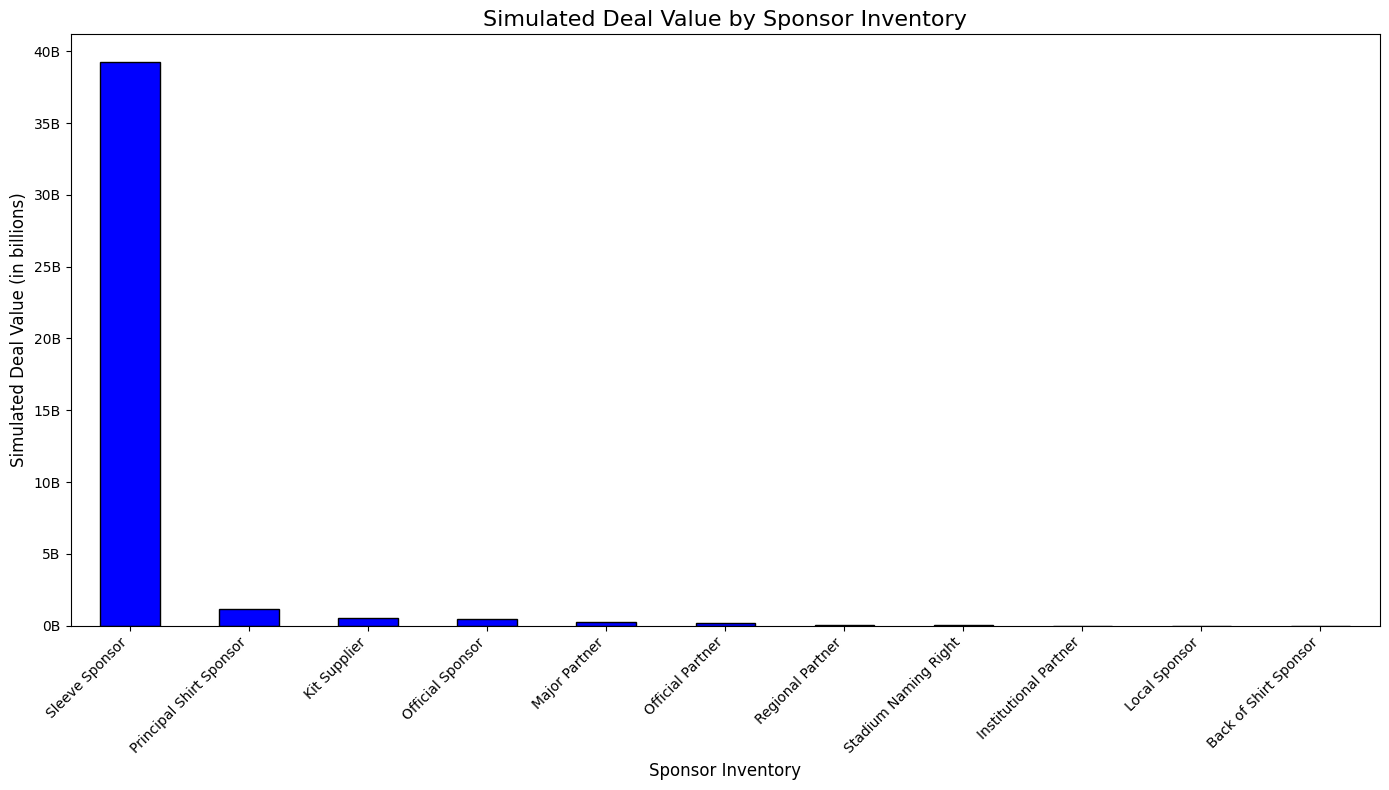

In [21]:
# Bar graph for sponsor inventory vs simulated deal value
inventory_value = risers_league_df.groupby('Sponsor inventory')['Simulated Deal Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
inventory_value.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Simulated Deal Value by Sponsor Inventory", fontsize=16)
plt.ylabel("Simulated Deal Value (in billions)", fontsize=12)
plt.xlabel("Sponsor Inventory", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
plt.tight_layout()
plt.savefig('sponsor_inventory_vs_value.png')
print("Bar graph of simulated deal value by sponsor inventory visualized.")


Since the analysis is going to focus on finding a category partnership e.g Official Automotive Partner rather than a Kit
or Stadium Naming Rights Partnership. We are going to drop the rows of Kit sponsors and stadium naming sponsorships as these are not the types of sponsorship deals we are looking at.

The sponsorships on the kit take up the top three spots for highest simulated deal value. Since these are not the sponsorships we are looking to fill, we are going to remove these rows from our analysis.

In [22]:
# Create a partitioned DataFrame excluding certain sponsorship types
excluded_sponsorship_types = [
    'Stadium Naming Right', 'Sleeve Sponsor', 'Kit Supplier', 'Principal Shirt Sponsor', 'Back of Shirt Sponsor'
]
filtered_risers_league_df = risers_league_df[~risers_league_df['Sponsor inventory'].isin(excluded_sponsorship_types)]

# Display the new partitioned DataFrame
#print(filtered_risers_league_df.head())

Some mis-labeled rows, so here they are renamed correctly.

In [23]:
# Correct the labels in the 'Sponsor Location' column
filtered_risers_league_df['Sponsor Location'] = filtered_risers_league_df['Sponsor Location'].replace({
    'China,China': 'China',
    'England,England': 'England'
})

# Verify the changes
print(filtered_risers_league_df['Sponsor Location'].unique())


['England' 'Malta' 'United States of America' 'Netherlands' 'Germany'
 'Switzerland' 'Isle of Man' 'Saudi Arabia' 'United Arab Emirates'
 'Austria' 'Czech Republic' 'China' 'France' 'Australia' 'Japan' 'Denmark'
 'Cyprus' 'Luxembourg' 'Sweden' 'Israel' 'Hong Kong' 'Northern Ireland'
 'Belgium' 'Nigeria' 'St. Vincent' 'Slovakia' 'Singapore' 'Malaysia'
 'Wales' 'India' 'Thailand' 'Poland' 'Spain' 'Taiwan' 'Turkey'
 'South Korea' 'Ireland' 'Italy' 'Mongolia']


<ipython-input-23-8f230b26c784>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Sponsor Location'] = filtered_risers_league_df['Sponsor Location'].replace({


Now we re-create the same graph as above and see the difference.

Bar graph of simulated deal value by sponsor inventory for filtered data visualized.


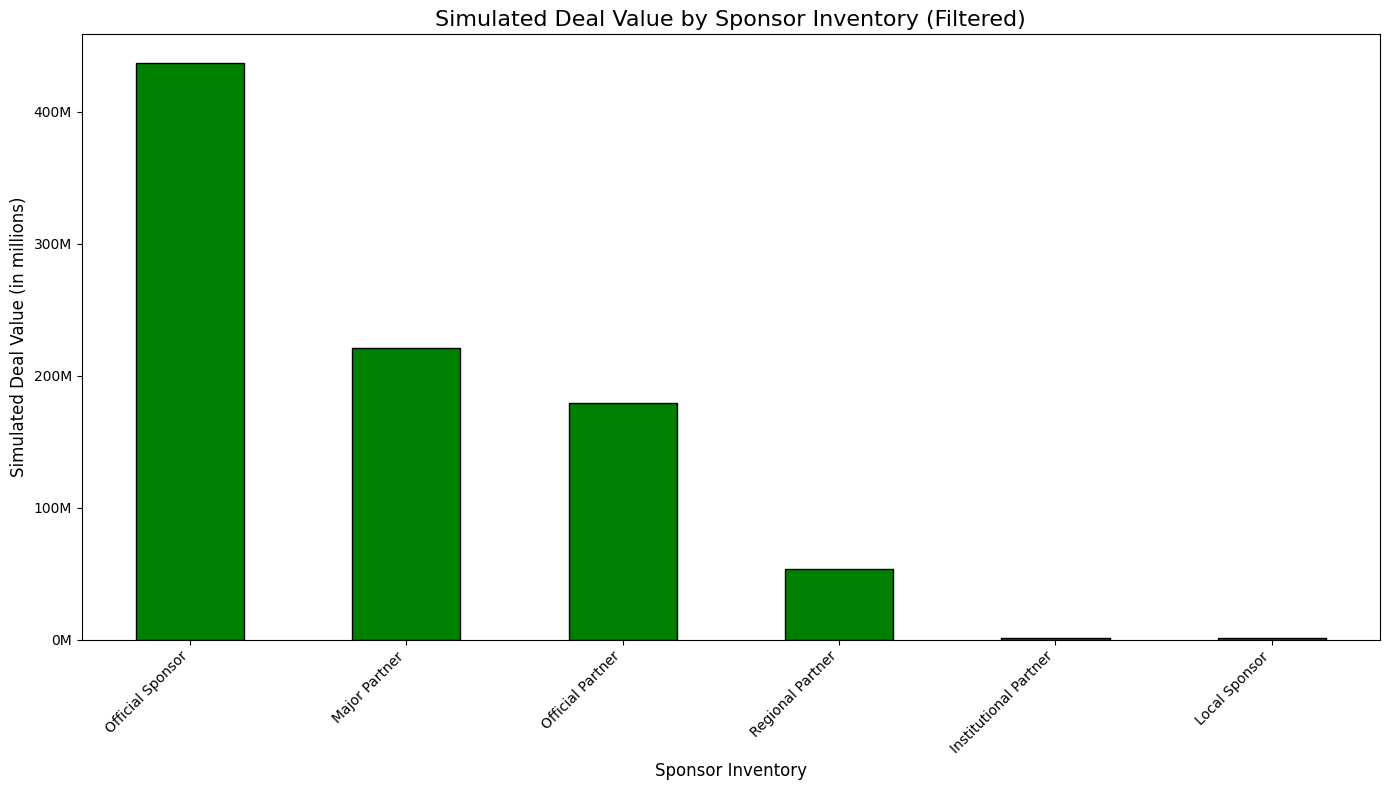

In [24]:
# Bar graph for sponsor inventory vs simulated deal value for filtered DataFrame
filtered_inventory_value = filtered_risers_league_df.groupby('Sponsor inventory')['Simulated Deal Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
filtered_inventory_value.plot(kind='bar', color='green', edgecolor='black')
plt.title("Simulated Deal Value by Sponsor Inventory (Filtered)", fontsize=16)
plt.ylabel("Simulated Deal Value (in millions)", fontsize=12)
plt.xlabel("Sponsor Inventory", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
plt.tight_layout()
plt.savefig('filtered_sponsor_inventory_vs_value.png')
print("Bar graph of simulated deal value by sponsor inventory for filtered data visualized.")

In [25]:
filtered_risers_league_df.head()

,Sponsor,Sponsor Location,Category,Rights Holder,Properties,Right Holder Location,Sport (Property),Sport Org. Type,Sponsorship Type,Sponsor inventory,Deal Start Date,Deal End Date,Deal Length,Deal Status,Simulated Deal Value
0,The Turmeric Co.,England,Nutritional Supplements,Moss FC,Mens,England,Football,Team,Official Sponsor,Official Sponsor,01-Jul-2022,30-Jun-2025,3.0,Active,200000
1,Betway,Malta,Betting,Coleman FC,Mens,England,Football,Team,Official Sponsor,Official Partner,01-Jul-2024,30-Jun-2026,2.0,Active,1000000
2,Ticketmaster,United States of America,Ticketing,Serrano FC,Mens,England,Football,Team,Official Sponsor,Official Sponsor,01-Jul-2023,30-Jun-2026,3.0,Active,500000
5,Heineken International,Netherlands,Beer,Bulldozers FC,Mens,England,Football,Team,Official Sponsor,Official Sponsor,01-Jul-2024,30-Jun-2029,5.0,Active,1000000
7,Goadsby,England,Real Estate Agency,Griffin FC,Mens,England,Football,Team,Official Sponsor,Official Partner,01-Jul-2024,30-Jun-2025,1.0,Active,100000


Graph to show total simulated deal value by location

<ipython-input-26-d845506a6018>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')
<ipython-input-26-d845506a6018>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year


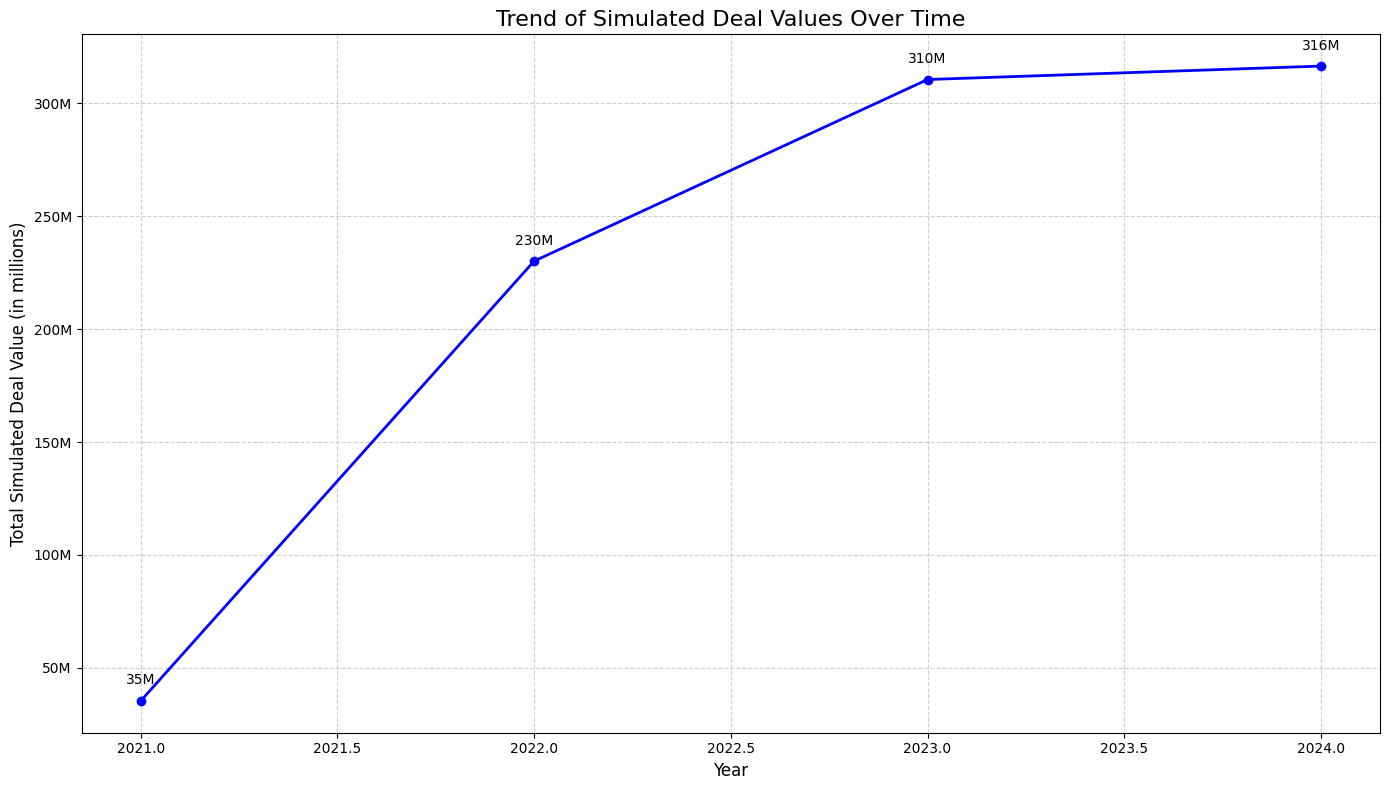

In [26]:
# Ensure 'Deal Start Date' is in datetime format
filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')

# Group by year and calculate total deal value per year
filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year
annual_deal_values = filtered_risers_league_df.groupby('Year')['Simulated Deal Value'].sum()

# Plot the trend of deal values over time
plt.figure(figsize=(14, 8))
plt.plot(annual_deal_values.index, annual_deal_values.values, marker='o', color='blue', linewidth=2)
plt.title("Trend of Simulated Deal Values Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Simulated Deal Value (in millions)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))

# Add point labels with adjusted positions
for x, y in zip(annual_deal_values.index, annual_deal_values.values):
    offset = 6e6  # Adjust this value to move the labels above or below the points
    plt.text(x, y + offset, f'{int(y / 1e6)}M', fontsize=10, ha='center', va='bottom', color='black')

# Add grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-27-9d725478f688>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year


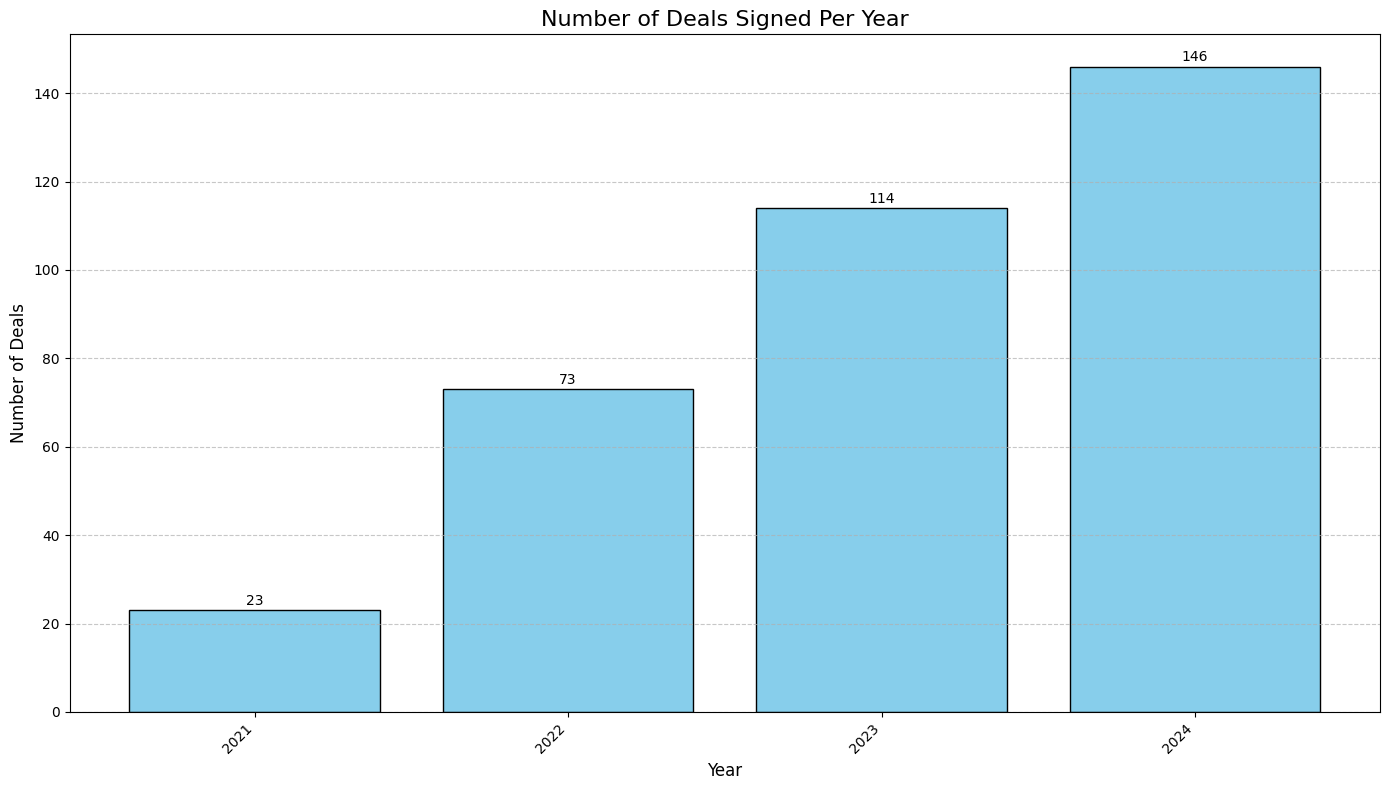

In [27]:
# Extract the year from 'Deal Start Date' and count the number of deals per year
filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year
deals_per_year = filtered_risers_league_df['Year'].value_counts().sort_index()

# Plot the bar chart with number labels
plt.figure(figsize=(14, 8))
bars = plt.bar(deals_per_year.index, deals_per_year.values, color='skyblue', edgecolor='black')

# Add number labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # Adjust position above the bar
        str(height),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Customize the chart
plt.title("Number of Deals Signed Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deals", fontsize=12)
plt.xticks(deals_per_year.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-28-1c2e603f1124>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')
<ipython-input-28-1c2e603f1124>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year


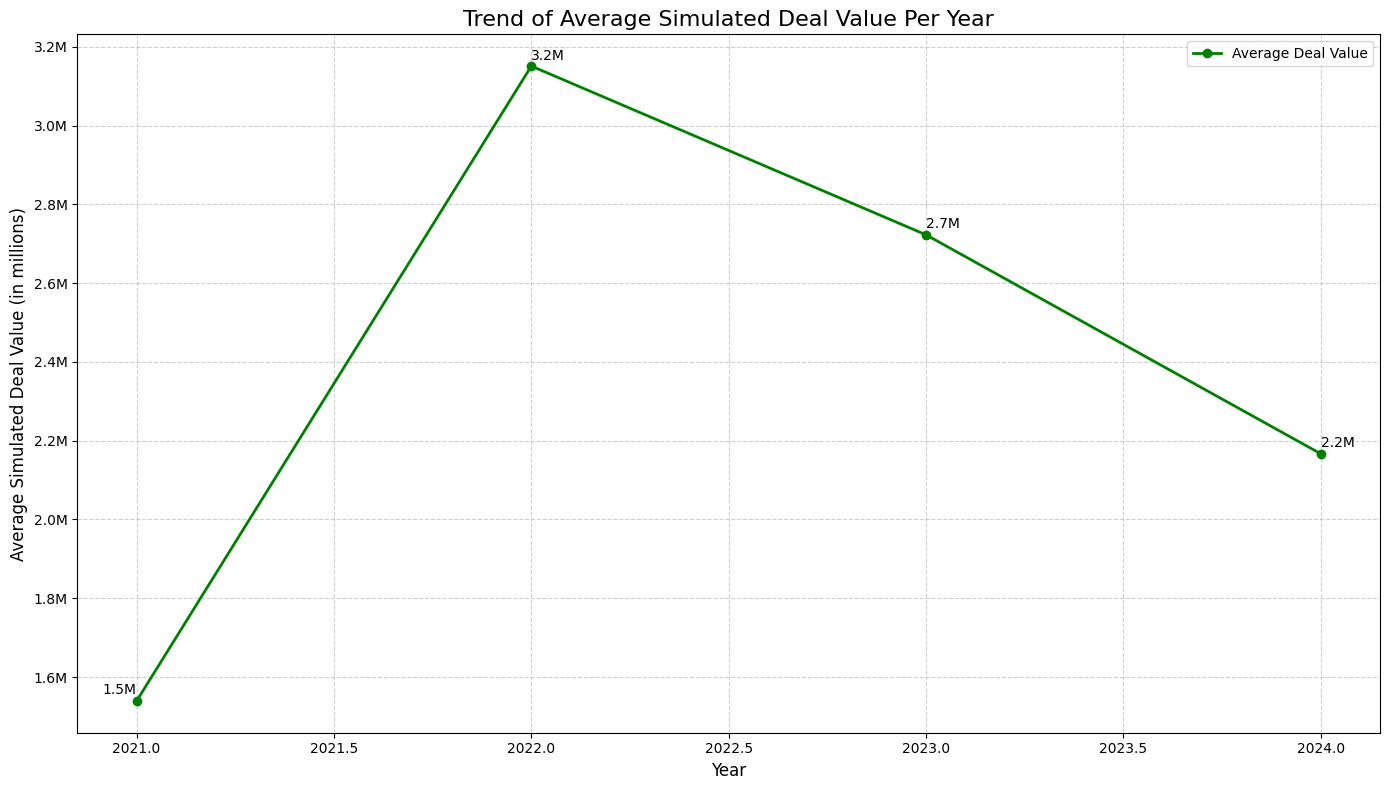

In [28]:
# Ensure 'Deal Start Date' is in datetime format
filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')

# Extract the year from 'Deal Start Date'
filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year

# Calculate the total deal value and the number of deals per year
yearly_stats = filtered_risers_league_df.groupby('Year').agg(
    total_value=('Simulated Deal Value', 'sum'),
    number_of_deals=('Simulated Deal Value', 'count')
).reset_index()

# Calculate the average deal value per year
yearly_stats['average_value'] = yearly_stats['total_value'] / yearly_stats['number_of_deals']

# Plot the average deal value per year
plt.figure(figsize=(14, 8))
plt.plot(yearly_stats['Year'], yearly_stats['average_value'], marker='o', color='green', linewidth=2, label='Average Deal Value')

# Add point labels with adjusted position
for i in range(len(yearly_stats)):
    plt.text(
        yearly_stats['Year'][i],
        yearly_stats['average_value'][i] + (yearly_stats['average_value'].max() * 0.0085),
        f"{yearly_stats['average_value'][i] / 1e6:.1f}M",
        fontsize=10,
        ha='right' if i == 0 else 'left',
        va='center'
    )

# Customize the plot
plt.title("Trend of Average Simulated Deal Value Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Simulated Deal Value (in millions)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-29-44bb6220a0d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')
<ipython-input-29-44bb6220a0d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year


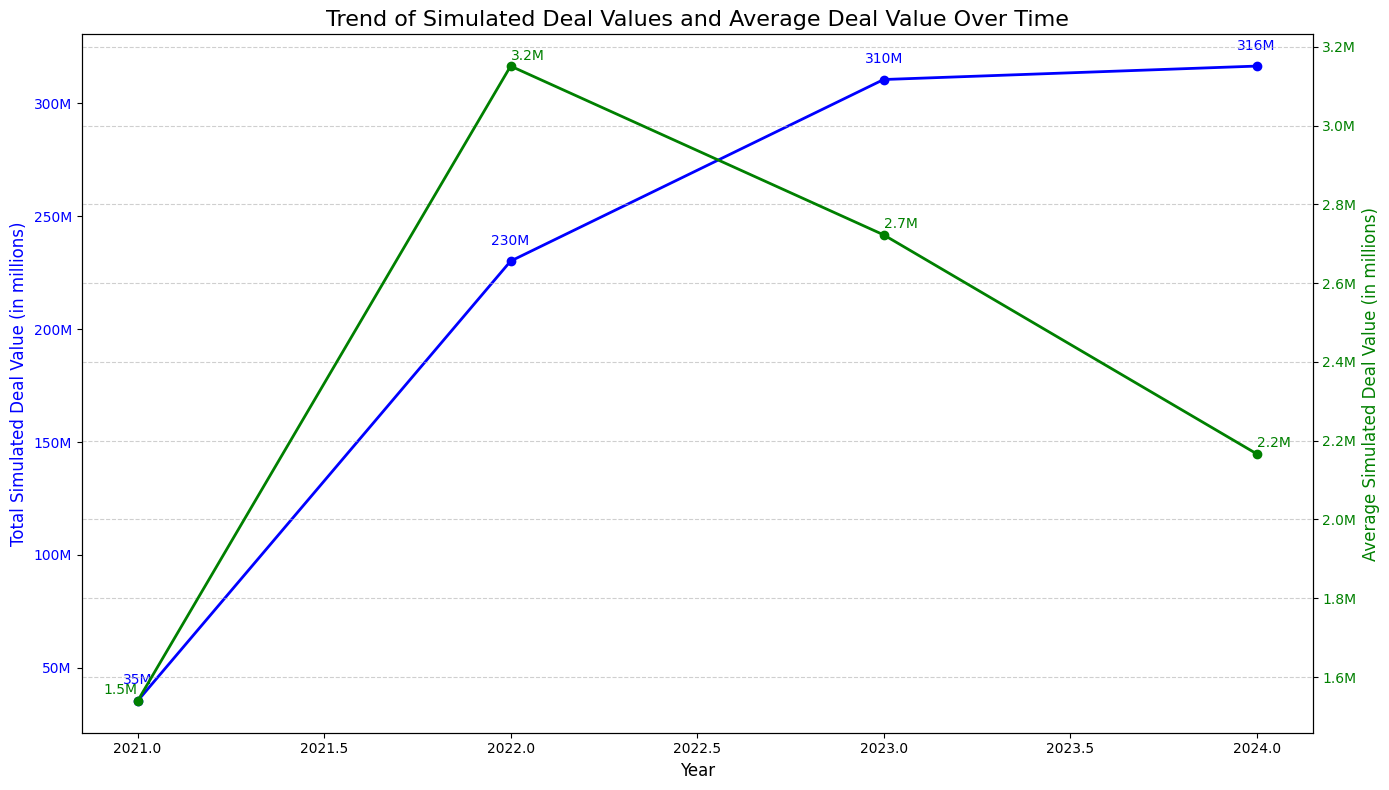

In [29]:
# Ensure 'Deal Start Date' is in datetime format
filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')

# Extract the year from 'Deal Start Date'
filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year

# Group data for plotting
annual_deal_values = filtered_risers_league_df.groupby('Year')['Simulated Deal Value'].sum()
yearly_stats = filtered_risers_league_df.groupby('Year').agg(
    total_value=('Simulated Deal Value', 'sum'),
    number_of_deals=('Simulated Deal Value', 'count')
).reset_index()
yearly_stats['average_value'] = yearly_stats['total_value'] / yearly_stats['number_of_deals']

# Combine the plots with dual axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# First y-axis for total deal values
color1 = 'blue'
ax1.set_title("Trend of Simulated Deal Values and Average Deal Value Over Time", fontsize=16)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Total Simulated Deal Value (in millions)", fontsize=12, color=color1)
ax1.plot(annual_deal_values.index, annual_deal_values.values, marker='o', color=color1, linewidth=2, label='Total Deal Value')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))

# Add point labels for total deal values
for x, y in zip(annual_deal_values.index, annual_deal_values.values):
    offset = 6e6  # Adjust this value to move the labels above or below the points
    ax1.text(x, y + offset, f'{int(y / 1e6)}M', fontsize=10, ha='center', va='bottom', color=color1)

# Second y-axis for average deal values
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel("Average Simulated Deal Value (in millions)", fontsize=12, color=color2)
ax2.plot(yearly_stats['Year'], yearly_stats['average_value'], marker='o', color=color2, linewidth=2, label='Average Deal Value')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

# Add point labels for average deal values
for i in range(len(yearly_stats)):
    ax2.text(
        yearly_stats['Year'][i],
        yearly_stats['average_value'][i] + (yearly_stats['average_value'].max() * 0.0085),
        f"{yearly_stats['average_value'][i] / 1e6:.1f}M",
        fontsize=10,
        ha='right' if i == 0 else 'left',
        va='center',
        color=color2
    )

# Add grid and layout
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-30-a7886993d3bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')
<ipython-input-30-a7886993d3bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year


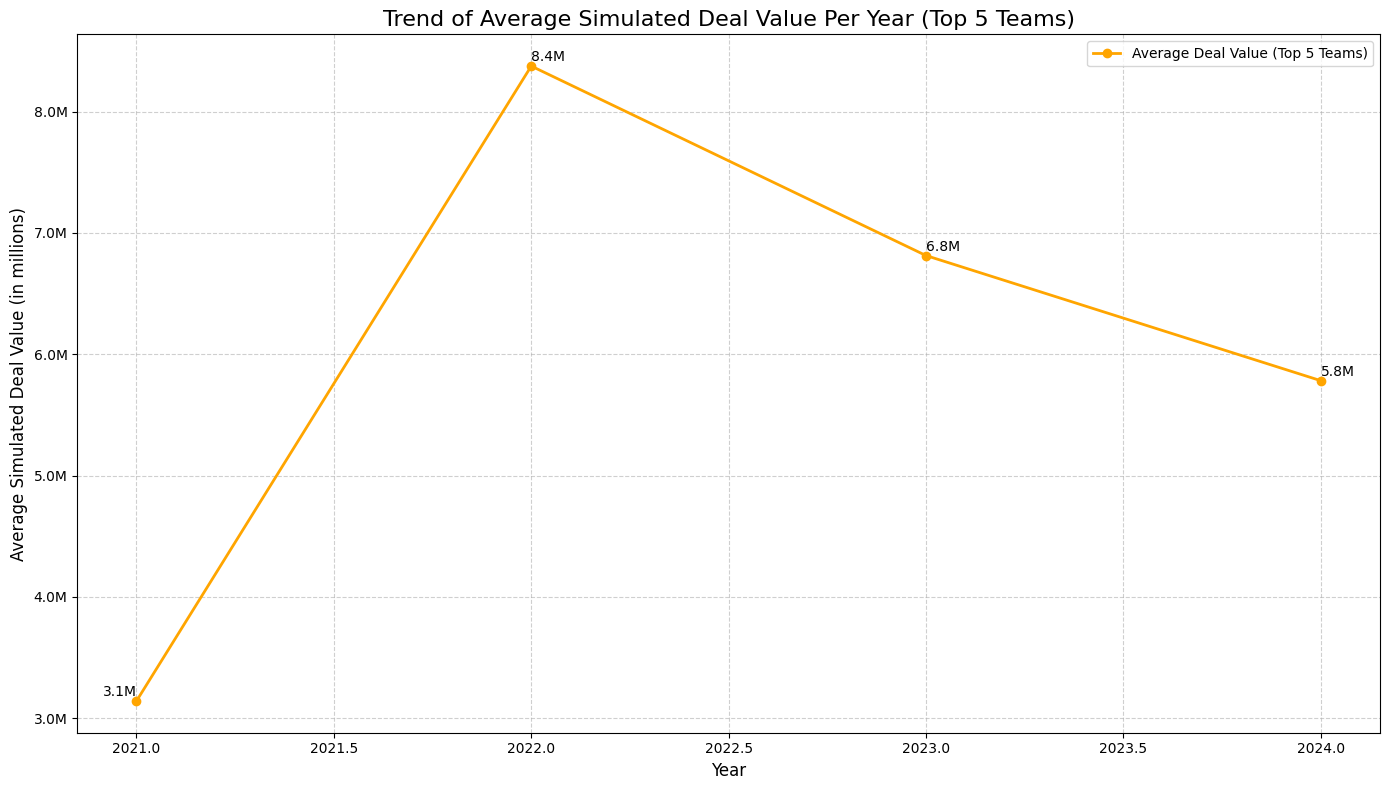

In [30]:
# Ensure 'Deal Start Date' is in datetime format
filtered_risers_league_df['Deal Start Date'] = pd.to_datetime(filtered_risers_league_df['Deal Start Date'], errors='coerce')

# Extract the year from 'Deal Start Date'
filtered_risers_league_df['Year'] = filtered_risers_league_df['Deal Start Date'].dt.year

# Calculate total sponsorship value by team
team_total_values = filtered_risers_league_df.groupby('Rights Holder')['Simulated Deal Value'].sum().sort_values(ascending=False)

# Get the top 5 teams by total sponsorship value
top_5_teams = team_total_values.head(5).index

# Filter the DataFrame to include only the top 5 teams
top_5_teams_df = filtered_risers_league_df[filtered_risers_league_df['Rights Holder'].isin(top_5_teams)]

# Calculate the total deal value and the number of deals per year for the top 5 teams
yearly_stats_top_5 = top_5_teams_df.groupby('Year').agg(
    total_value=('Simulated Deal Value', 'sum'),
    number_of_deals=('Simulated Deal Value', 'count')
).reset_index()

# Calculate the average deal value per year
yearly_stats_top_5['average_value'] = yearly_stats_top_5['total_value'] / yearly_stats_top_5['number_of_deals']

# Plot the average deal value per year for the top 5 teams
plt.figure(figsize=(14, 8))
plt.plot(yearly_stats_top_5['Year'], yearly_stats_top_5['average_value'], marker='o', color='orange', linewidth=2, label='Average Deal Value (Top 5 Teams)')

# Add point labels
for i in range(len(yearly_stats_top_5)):
    plt.text(
        yearly_stats_top_5['Year'][i],
        yearly_stats_top_5['average_value'][i] + (yearly_stats_top_5['average_value'].max() * 0.0085),  # Adjust label position above the point
        f"{yearly_stats_top_5['average_value'][i] / 1e6:.1f}M",
        fontsize=10,
        ha='right' if i == 0 else 'left',  # First point is 'right', others are 'left'
        va='center'
    )

# Customize the plot
plt.title("Trend of Average Simulated Deal Value Per Year (Top 5 Teams)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Simulated Deal Value (in millions)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


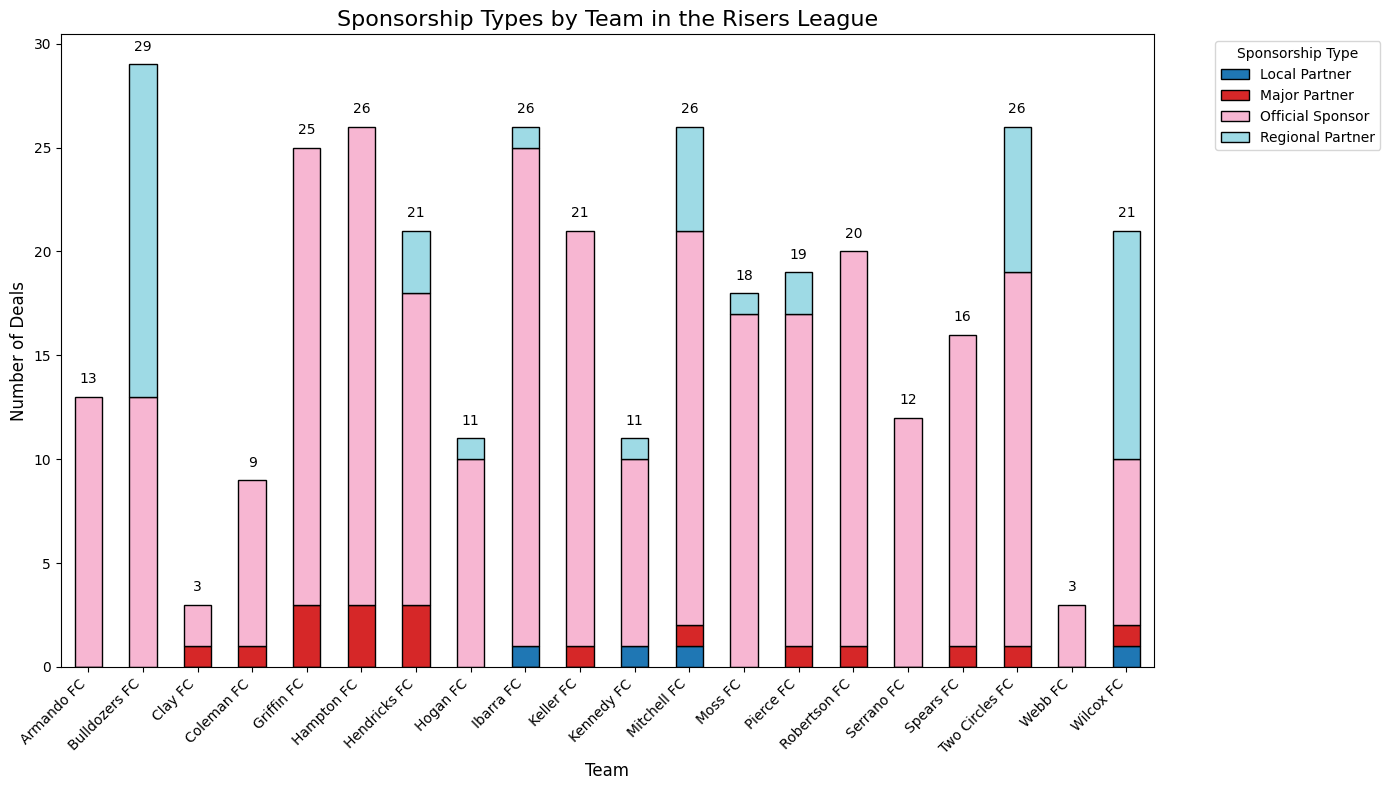

In [31]:
# Stacked bar chart for sponsorship types by team
sponsorship_by_team = filtered_risers_league_df.pivot_table(
    index='Rights Holder',
    columns='Sponsorship Type',
    aggfunc='size',
    fill_value=0
)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bars = sponsorship_by_team.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black', ax=ax)

# Add total number of deals on top of each bar
for idx, team in enumerate(sponsorship_by_team.index):
    total_deals = sponsorship_by_team.loc[team].sum()
    ax.text(idx, total_deals + 0.5,  # Position slightly above the bar
            f"{total_deals}",
            ha='center', va='bottom', fontsize=10, color='black')

# Customize the legend placement
ax.legend(title="Sponsorship Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.title("Sponsorship Types by Team in the Risers League", fontsize=16)
plt.ylabel("Number of Deals", fontsize=12)
plt.xlabel("Team", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


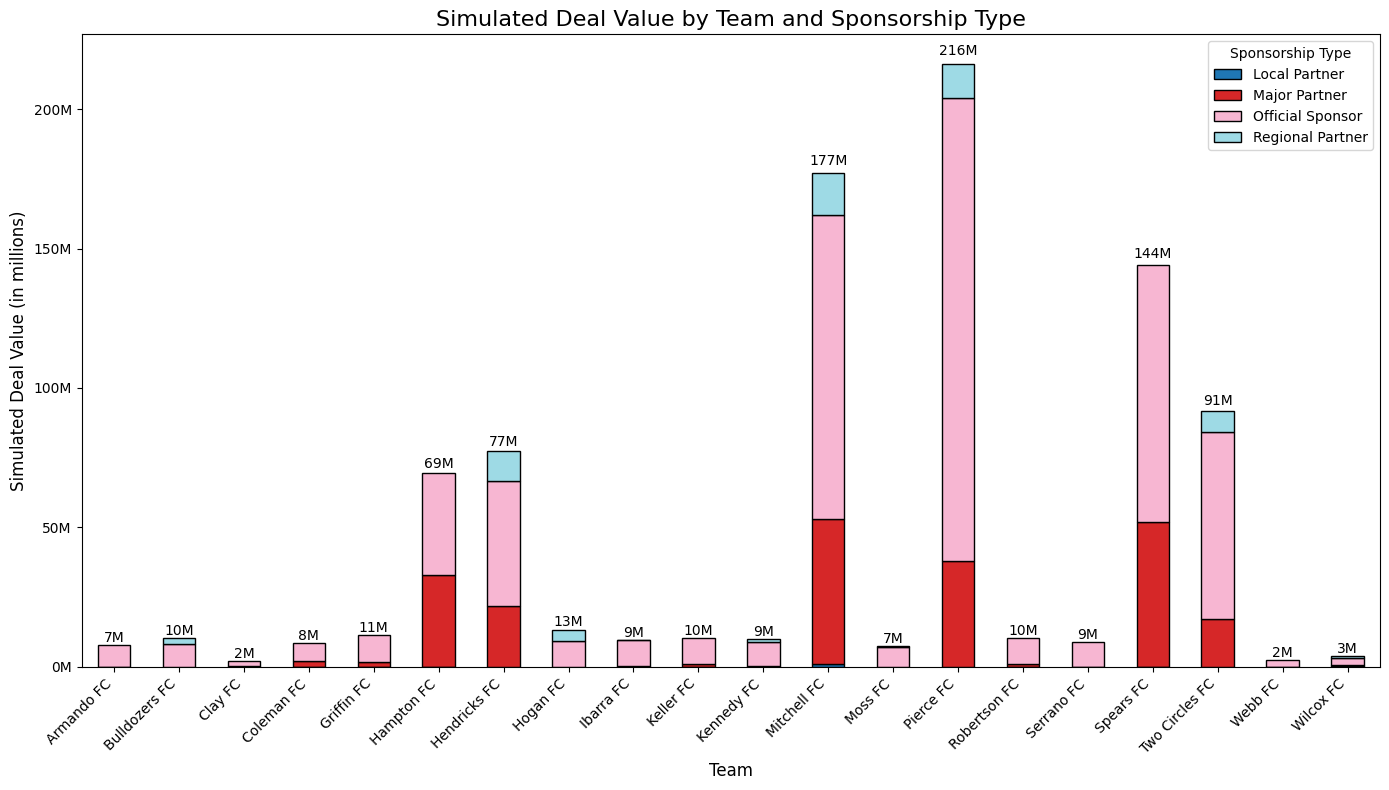

In [32]:
# Stacked bar chart for simulated deal values by team and sponsorship type
sponsorship_value_by_team = filtered_risers_league_df.pivot_table(
    index='Rights Holder',
    columns='Sponsorship Type',
    values='Simulated Deal Value',
    aggfunc='sum',
    fill_value=0
)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bars = sponsorship_value_by_team.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black', ax=ax)

# Add total values on top of each bar
for idx, team in enumerate(sponsorship_value_by_team.index):
    total_value = sponsorship_value_by_team.loc[team].sum()
    ax.text(idx, total_value + (total_value * 0.01),  # Position slightly above the bar
            f"{int(total_value / 1e6)}M",
            ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.title("Simulated Deal Value by Team and Sponsorship Type", fontsize=16)
plt.ylabel("Simulated Deal Value (in millions)", fontsize=12)
plt.xlabel("Team", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


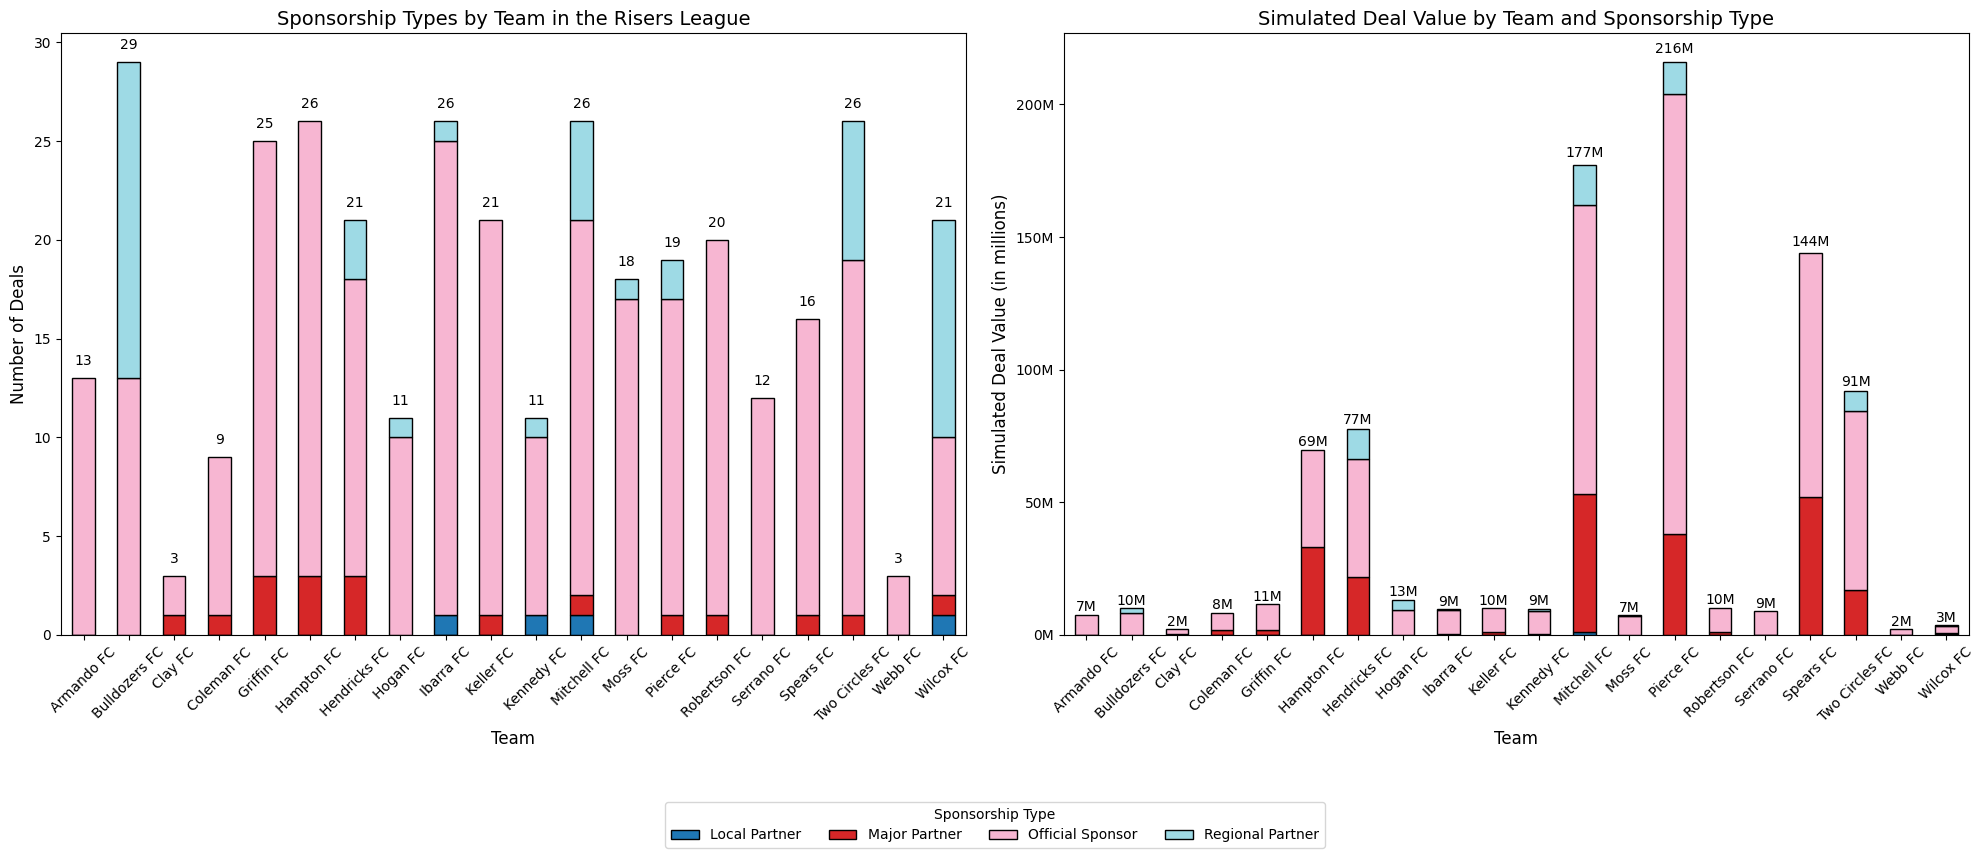

In [33]:
# Create a side-by-side layout
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Plot sponsorship types by team (number of deals)
bars1 = sponsorship_by_team.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black', ax=axes[0], legend=False)
axes[0].set_title("Sponsorship Types by Team in the Risers League", fontsize=14)
axes[0].set_ylabel("Number of Deals", fontsize=12)
axes[0].set_xlabel("Team", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for idx, team in enumerate(sponsorship_by_team.index):
    total_deals = sponsorship_by_team.loc[team].sum()
    axes[0].text(idx, total_deals + 0.5, f"{total_deals}", ha='center', va='bottom', fontsize=10, color='black')

# Plot sponsorship values by team (total deal value)
bars2 = sponsorship_value_by_team.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black', ax=axes[1], legend=False)
axes[1].set_title("Simulated Deal Value by Team and Sponsorship Type", fontsize=14)
axes[1].set_ylabel("Simulated Deal Value (in millions)", fontsize=12)
axes[1].set_xlabel("Team", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
for idx, team in enumerate(sponsorship_value_by_team.index):
    total_value = sponsorship_value_by_team.loc[team].sum()
    axes[1].text(idx, total_value + (total_value * 0.01), f"{int(total_value / 1e6)}M", ha='center', va='bottom', fontsize=10, color='black')

# Shared legend
handles, labels = bars1.get_legend_handles_labels()
fig.legend(handles, labels, title="Sponsorship Type", bbox_to_anchor=(0.5, -0.00001), loc='upper center', ncol=4)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust layout to fit the shared legend
plt.show()


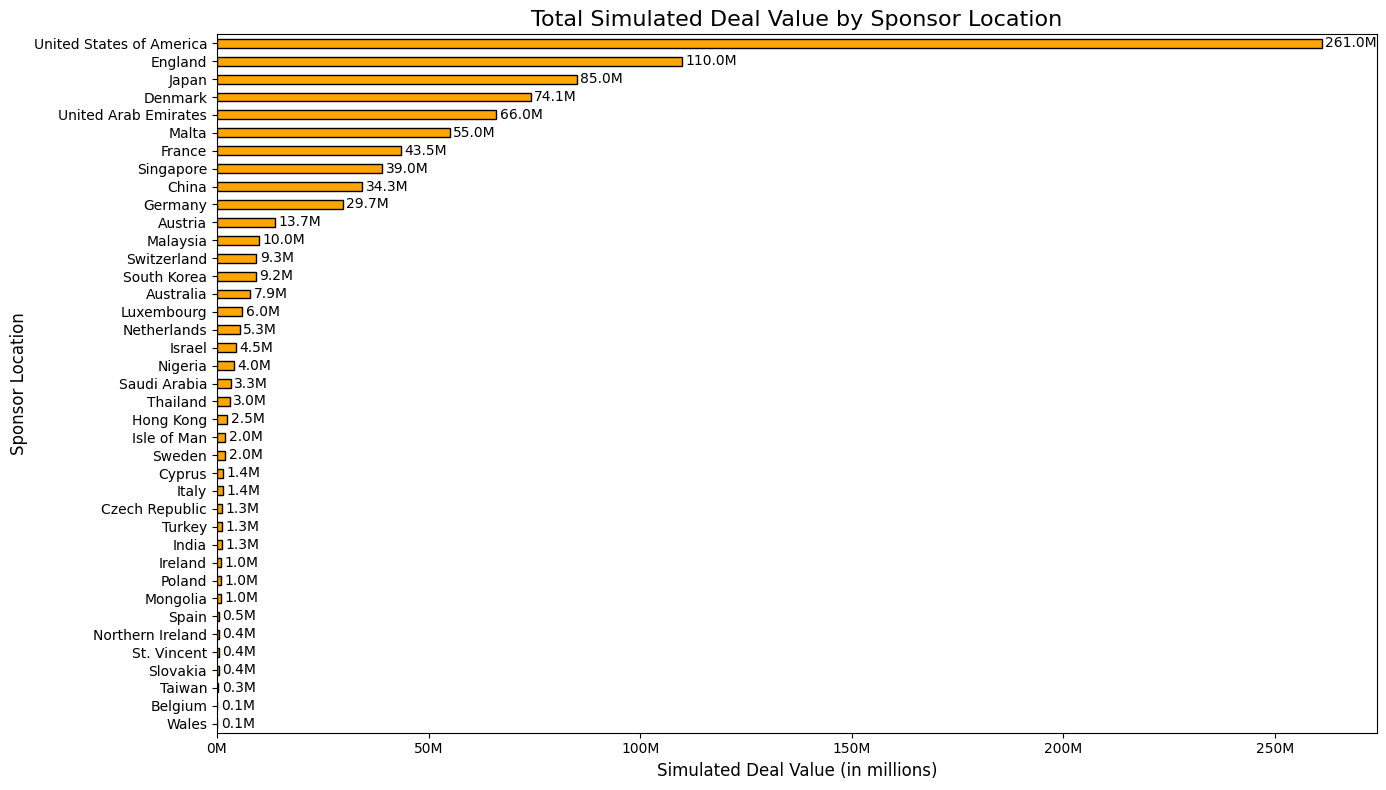

In [34]:
# Group by sponsor location and calculate total simulated deal value
location_value = filtered_risers_league_df.groupby('Sponsor Location')['Simulated Deal Value'].sum().sort_values(ascending=True)

# Plot the horizontal bar chart for total simulated deal value by sponsor location
fig, ax = plt.subplots(figsize=(14, 8))
bars = location_value.plot(kind='barh', color='orange', edgecolor='black', ax=ax)

# Add total values at the end of each bar with adjustments
xlim = ax.get_xlim()[1]  # Get the maximum x-axis limit
for idx, value in enumerate(location_value):
    label_position = min(value + (xlim * 0.003), xlim - (xlim * 0.003))  # Ensure label stays within bounds
    ax.text(label_position, idx,  # Adjust position
            f"{value / 1e6:.1f}M",  # Use 2 decimal places
            va='center', ha='left', fontsize=10, color='black')

# Customize the plot
plt.title("Total Simulated Deal Value by Sponsor Location", fontsize=16)
plt.xlabel("Simulated Deal Value (in millions)", fontsize=12)
plt.ylabel("Sponsor Location", fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
plt.tight_layout()

# Show the plot
plt.show()


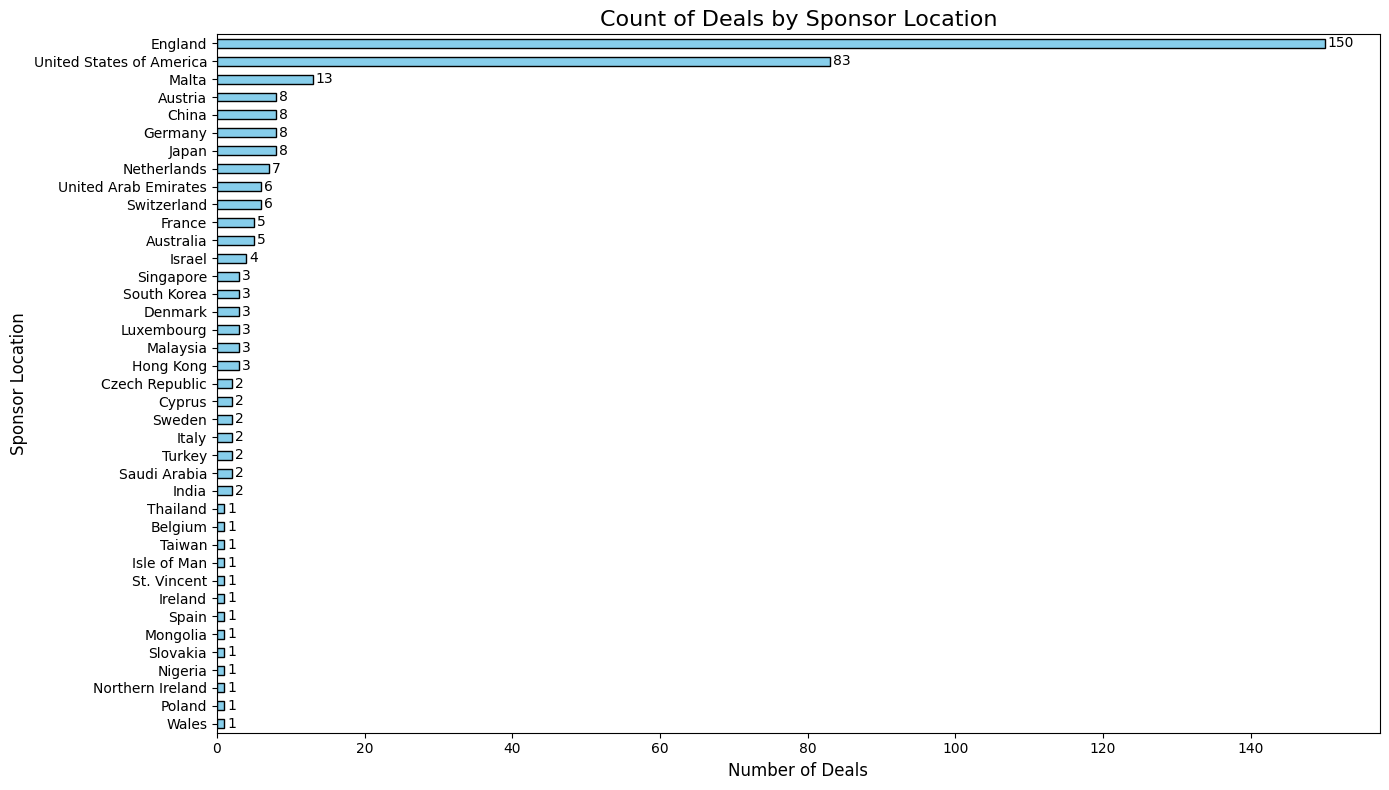

In [35]:
# Group by sponsor location and calculate the count of deals
location_count = filtered_risers_league_df.groupby('Sponsor Location').size().sort_values(ascending=True)

# Plot the horizontal bar chart for count of deals by sponsor location
fig, ax = plt.subplots(figsize=(14, 8))
bars = location_count.plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

# Add total count at the end of each bar
for idx, value in enumerate(location_count):
    ax.text(value + 0.4, idx,  # Slightly to the right of the bar
            f"{value}",
            va='center', ha='left', fontsize=10, color='black')

# Customize the plot
plt.title("Count of Deals by Sponsor Location", fontsize=16)
plt.xlabel("Number of Deals", fontsize=12)
plt.ylabel("Sponsor Location", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


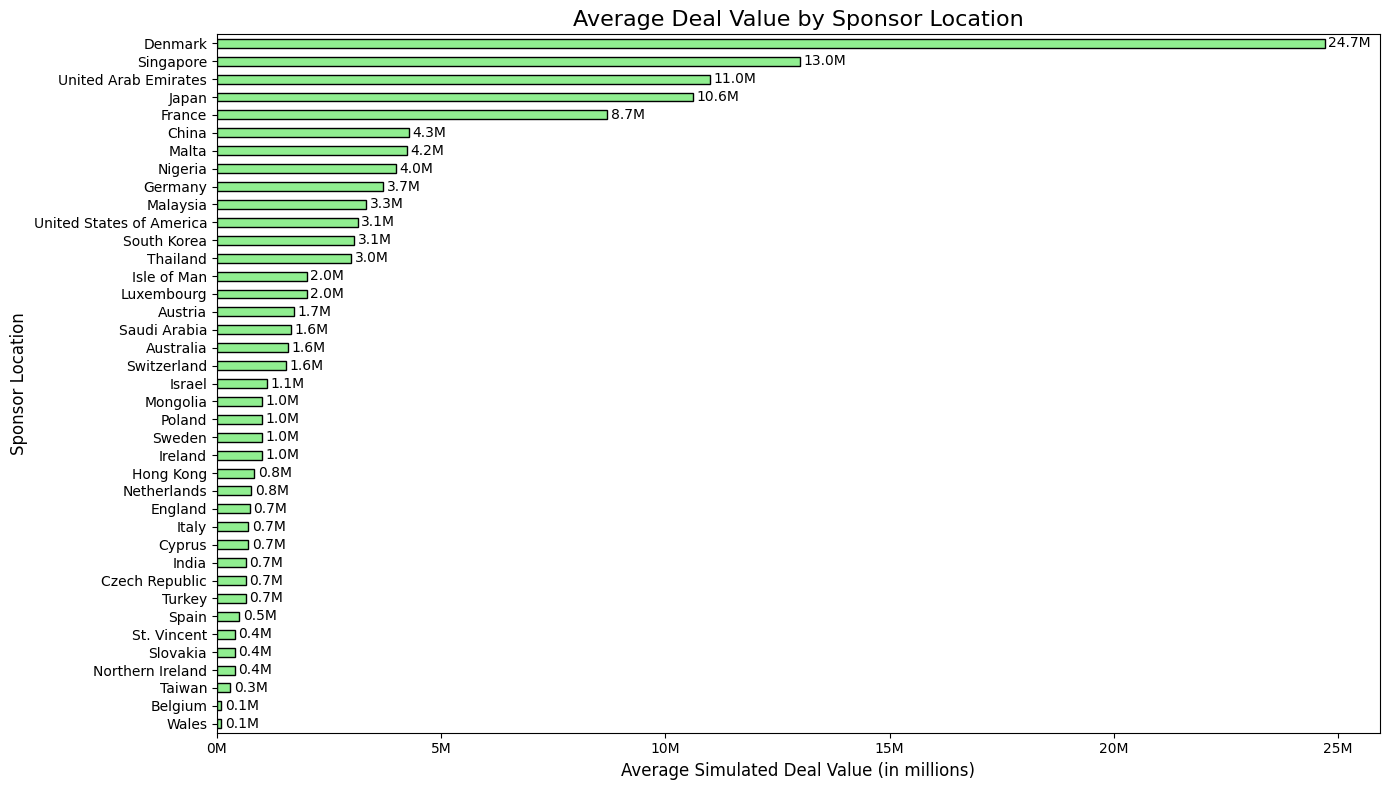

In [36]:
# Group by sponsor location and calculate the average deal value
location_avg_value = filtered_risers_league_df.groupby('Sponsor Location')['Simulated Deal Value'].mean().sort_values(ascending=True)

# Plot the horizontal bar chart for average deal value by sponsor location
fig, ax = plt.subplots(figsize=(14, 8))
bars = location_avg_value.plot(kind='barh', color='lightgreen', edgecolor='black', ax=ax)

# Add average deal values at the end of each bar with adjustments
xlim = ax.get_xlim()[1]
for idx, value in enumerate(location_avg_value):
    label_position = min(value + (xlim * 0.003), xlim - (xlim * 0.003))
    ax.text(label_position, idx,
            f"{value / 1e6:.1f}M",
            va='center', ha='left', fontsize=10, color='black')

# Customize the plot
plt.title("Average Deal Value by Sponsor Location", fontsize=16)
plt.xlabel("Average Simulated Deal Value (in millions)", fontsize=12)
plt.ylabel("Sponsor Location", fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
plt.tight_layout()

# Show the plot
plt.show()


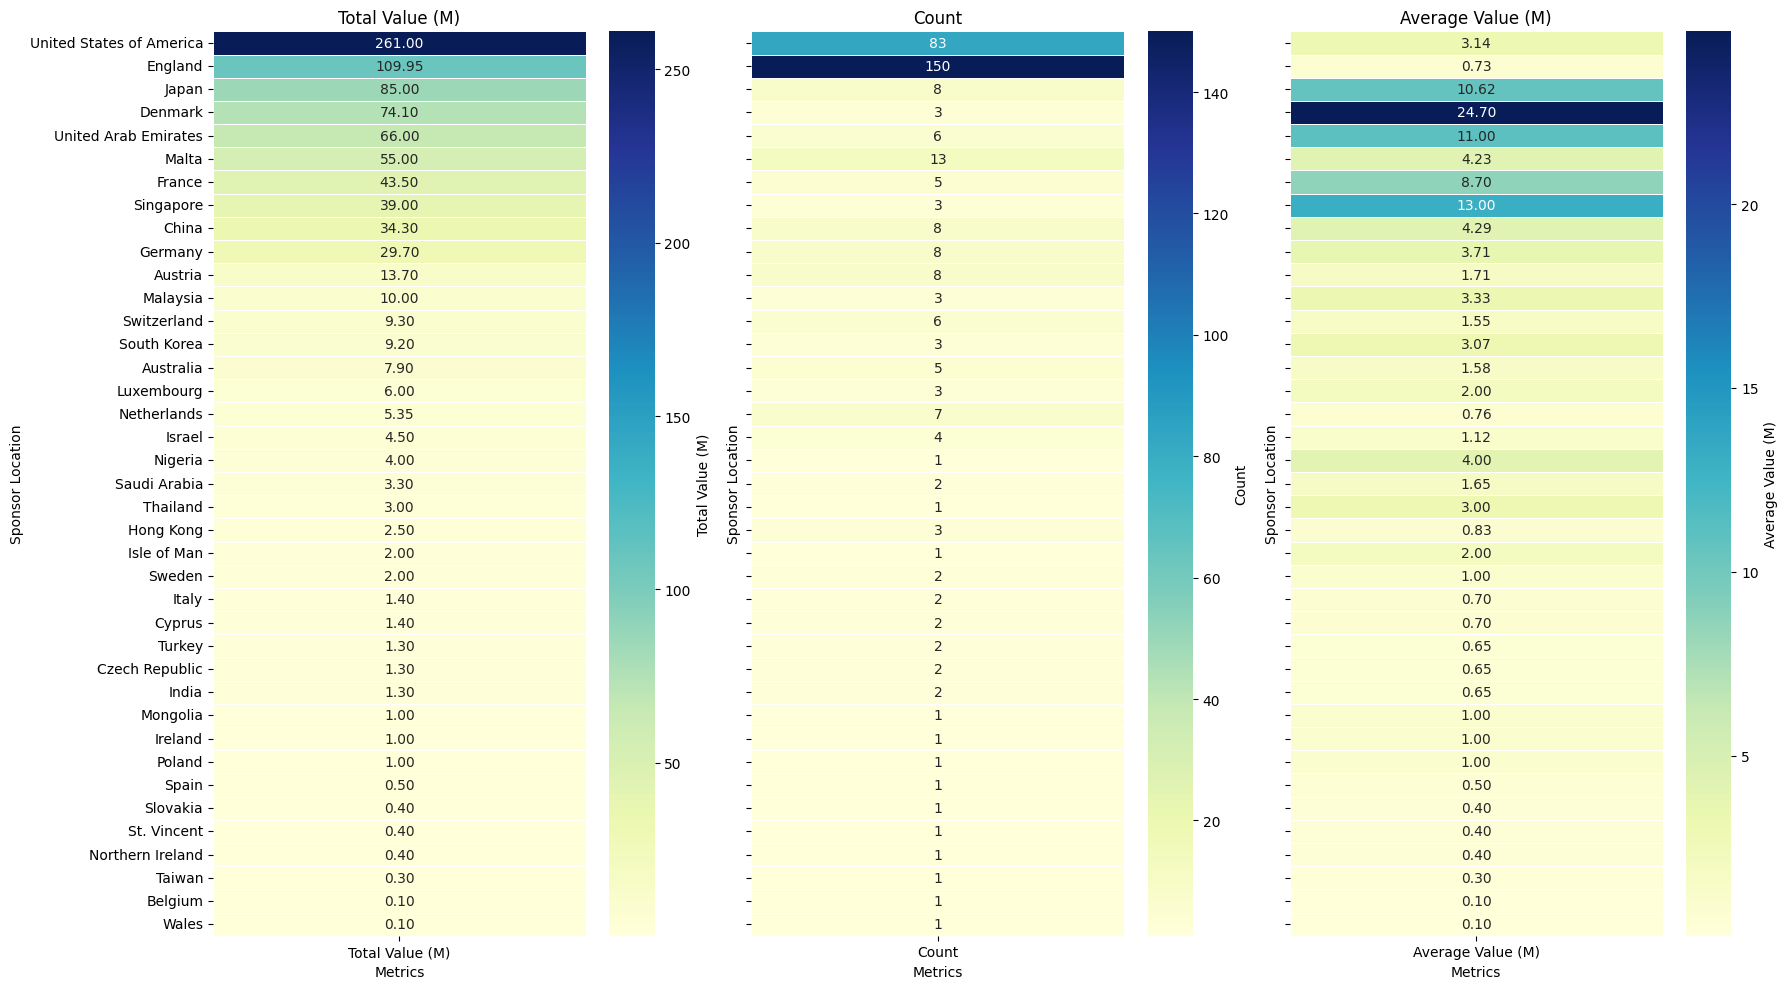

In [37]:
# Prepare the data
heatmap_data = pd.DataFrame({
    'Total Value (M)': filtered_risers_league_df.groupby('Sponsor Location')['Simulated Deal Value'].sum() / 1e6,
    'Count': filtered_risers_league_df.groupby('Sponsor Location').size(),
    'Average Value (M)': filtered_risers_league_df.groupby('Sponsor Location')['Simulated Deal Value'].mean() / 1e6
}).reset_index()

# Sort the data by 'Total Value (M)' in descending order
heatmap_data = heatmap_data.sort_values(by='Total Value (M)', ascending=False)

# Set up the figure for three heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 10), sharey=True)

# Total Value Heatmap
sns.heatmap(
    heatmap_data[['Sponsor Location', 'Total Value (M)']].set_index('Sponsor Location'),
    ax=axes[0],
    cmap='YlGnBu',
    cbar_kws={'label': 'Total Value (M)'},
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
axes[0].set_title('Total Value (M)')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Sponsor Location')

# Count Heatmap
sns.heatmap(
    heatmap_data[['Sponsor Location', 'Count']].set_index('Sponsor Location'),
    ax=axes[1],
    cmap='YlGnBu',
    cbar_kws={'label': 'Count'},
    annot=True,
    fmt=".0f",
    linewidths=0.5
)
axes[1].set_title('Count')
axes[1].set_xlabel('Metrics')

# Average Value Heatmap
sns.heatmap(
    heatmap_data[['Sponsor Location', 'Average Value (M)']].set_index('Sponsor Location'),
    ax=axes[2],
    cmap='YlGnBu',
    cbar_kws={'label': 'Average Value (M)'},
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
axes[2].set_title('Average Value (M)')
axes[2].set_xlabel('Metrics')

# Adjust layout
plt.tight_layout()
plt.show()


In [38]:
# Define the bins and labels for the sponsorship value bands
bins = [0, 1e6, 5e6, 10e6, 20e6, 50e6, 100e6]
labels = ['<1M', '1M-5M', '5M-10M', '10M-20M', '20M-50M', '50M-100M']

# Filter for deals in the USA
usa_deals = filtered_risers_league_df[filtered_risers_league_df['Sponsor Location'] == 'United States of America']
usa_deals['Value Band'] = pd.cut(
    usa_deals['Simulated Deal Value'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
usa_value_band_frequency = usa_deals['Value Band'].value_counts().sort_index()

# Create a cumulative frequency percentage for the USA
usa_cumulative_frequency = usa_value_band_frequency.cumsum() / usa_value_band_frequency.sum() * 100

# Create a table for the USA
usa_value_band_table = pd.DataFrame({
    'Value Band': usa_value_band_frequency.index,
    'Frequency': usa_value_band_frequency.values,
    'Cumulative Frequency (%)': usa_cumulative_frequency.values
}).reset_index(drop=True)

# Filter for deals in England
england_deals = filtered_risers_league_df[filtered_risers_league_df['Sponsor Location'] == 'England']
england_deals['Value Band'] = pd.cut(
    england_deals['Simulated Deal Value'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
england_value_band_frequency = england_deals['Value Band'].value_counts().sort_index()

# Create a cumulative frequency percentage for England
england_cumulative_frequency = england_value_band_frequency.cumsum() / england_value_band_frequency.sum() * 100

# Create a table for England
england_value_band_table = pd.DataFrame({
    'Value Band': england_value_band_frequency.index,
    'Frequency': england_value_band_frequency.values,
    'Cumulative Frequency (%)': england_cumulative_frequency.values
}).reset_index(drop=True)

# Display the tables
print("USA Value Band Table:")
print(usa_value_band_table)

print("\nEngland Value Band Table:")
print(england_value_band_table)

USA Value Band Table:
  Value Band  Frequency  Cumulative Frequency (%)
0        <1M         51                 61.445783
1      1M-5M         21                 86.746988
2     5M-10M          8                 96.385542
3    10M-20M          1                 97.590361
4    20M-50M          1                 98.795181
5   50M-100M          1                100.000000

England Value Band Table:
  Value Band  Frequency  Cumulative Frequency (%)
0        <1M        133                 88.666667
1      1M-5M         15                 98.666667
2     5M-10M          1                 99.333333
3    10M-20M          1                100.000000
4    20M-50M          0                100.000000
5   50M-100M          0                100.000000


<ipython-input-38-5179b8305384>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_deals['Value Band'] = pd.cut(
<ipython-input-38-5179b8305384>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_deals['Value Band'] = pd.cut(


In [39]:
# Define the bins and labels for the sponsorship value bands
bins = [0, 1e6, 5e6, 10e6, 20e6, 50e6, 100e6]
labels = ['<1M', '1M-5M', '5M-10M', '10M-20M', '20M-50M', '50M-100M']

# Function to create a table for a specific country
def create_value_band_table(country):
    country_deals = filtered_risers_league_df[filtered_risers_league_df['Sponsor Location'] == country]
    country_deals['Value Band'] = pd.cut(
        country_deals['Simulated Deal Value'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    country_value_band_frequency = country_deals['Value Band'].value_counts().sort_index()
    cumulative_frequency = country_value_band_frequency.cumsum() / country_value_band_frequency.sum() * 100

    # Create the table
    country_table = pd.DataFrame({
        'Value Band': country_value_band_frequency.index,
        'Frequency': country_value_band_frequency.values,
        'Cumulative Frequency (%)': cumulative_frequency.values
    }).reset_index(drop=True)
    return country_table

# Create tables for Japan, UAE, and Malta
japan_table = create_value_band_table('Japan')
uae_table = create_value_band_table('United Arab Emirates')
malta_table = create_value_band_table('Malta')

# Display the tables
print("Japan Value Band Table:")
print(japan_table)

print("\nUAE Value Band Table:")
print(uae_table)

print("\nMalta Value Band Table:")
print(malta_table)

Japan Value Band Table:
  Value Band  Frequency  Cumulative Frequency (%)
0        <1M          1                      12.5
1      1M-5M          4                      62.5
2     5M-10M          2                      87.5
3    10M-20M          0                      87.5
4    20M-50M          0                      87.5
5   50M-100M          1                     100.0

UAE Value Band Table:
  Value Band  Frequency  Cumulative Frequency (%)
0        <1M          1                 16.666667
1      1M-5M          1                 33.333333
2     5M-10M          1                 50.000000
3    10M-20M          3                100.000000
4    20M-50M          0                100.000000
5   50M-100M          0                100.000000

Malta Value Band Table:
  Value Band  Frequency  Cumulative Frequency (%)
0        <1M          6                 46.153846
1      1M-5M          4                 76.923077
2     5M-10M          2                 92.307692
3    10M-20M          0     

<ipython-input-39-ff70023d8023>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_deals['Value Band'] = pd.cut(
<ipython-input-39-ff70023d8023>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_deals['Value Band'] = pd.cut(
<ipython-input-39-ff70023d8023>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-40-8eddd61409ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


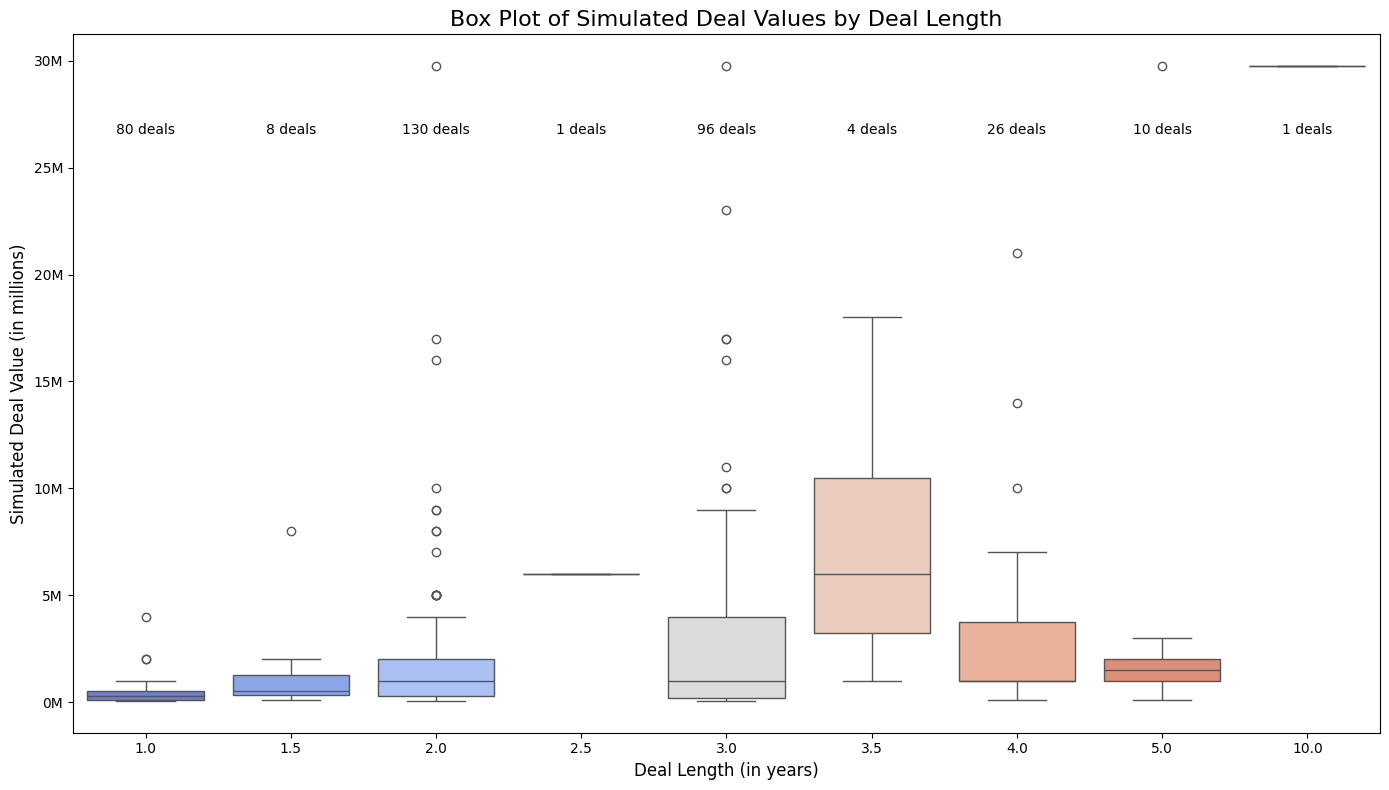

In [40]:
# Create a box plot for each deal length, showing simulated deal value with windsorization
plt.figure(figsize=(14, 8))

# Apply windsorization to remove extreme outliers
windsorized_values = filtered_risers_league_df.copy()
windsorized_values['Simulated Deal Value'] = windsorized_values['Simulated Deal Value'].clip(
    lower=windsorized_values['Simulated Deal Value'].quantile(0.01),
    upper=windsorized_values['Simulated Deal Value'].quantile(0.99)
)

# Count the number of deals for each deal length
deal_counts = windsorized_values['Deal Length'].value_counts().sort_index()

# Create the box plot
sns.boxplot(
    x='Deal Length',
    y='Simulated Deal Value',
    data=windsorized_values,
    palette='coolwarm'
)

# Add deal count as text annotations
for i, count in enumerate(deal_counts):
    plt.text(
        i, windsorized_values['Simulated Deal Value'].max() * 0.9,  # Position the text slightly below the max value
        f"{count} deals",
        ha='center', va='center', fontsize=10, color='black'
    )

# Customize the plot
plt.title("Box Plot of Simulated Deal Values by Deal Length", fontsize=16)
plt.xlabel("Deal Length (in years)", fontsize=12)
plt.ylabel("Simulated Deal Value (in millions)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
plt.tight_layout()
#plt.savefig('boxplot_deal_length_with_counts.png')
plt.show()


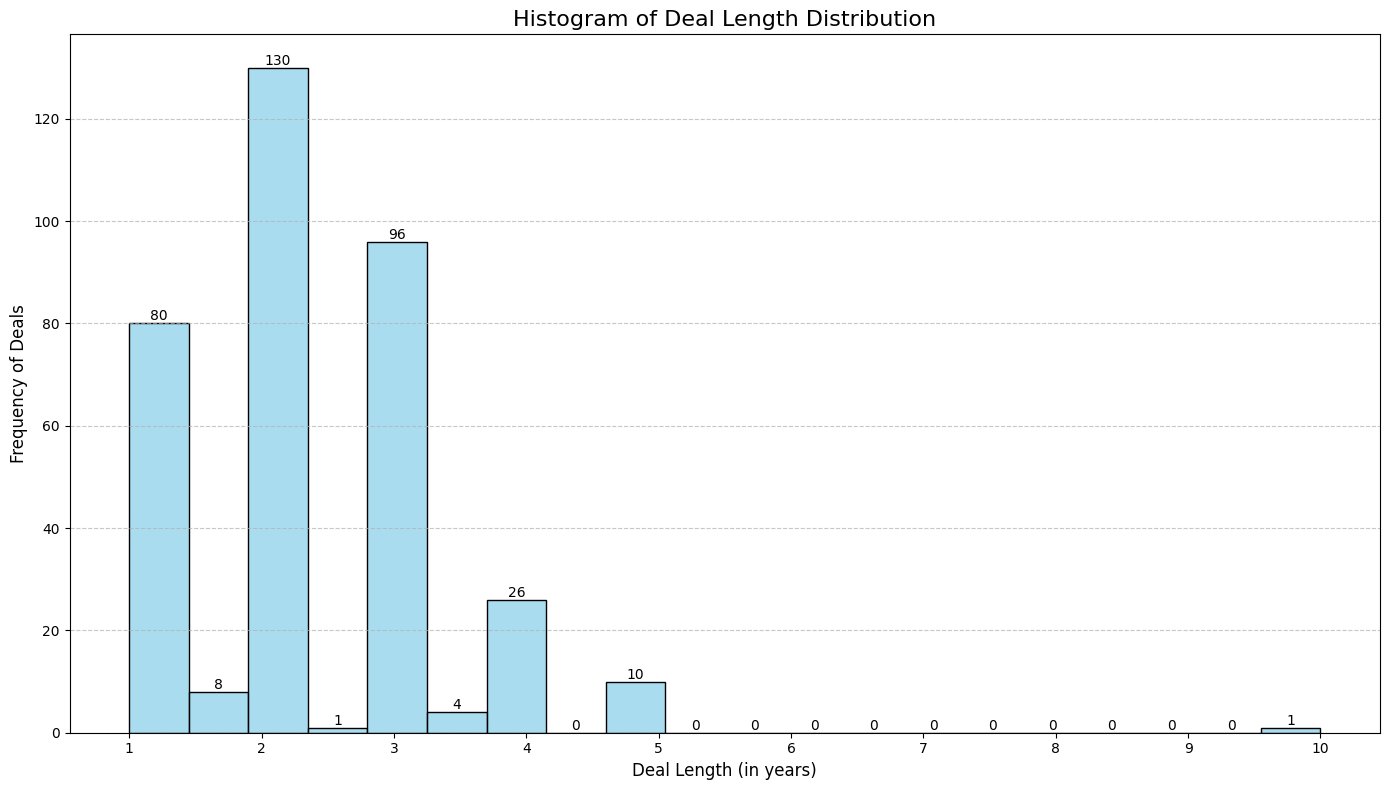

In [41]:
# Create a histogram to show the distribution of deal lengths
plt.figure(figsize=(14, 8))

# Plot histogram with grid lines and better bin granularity
ax = sns.histplot(
    filtered_risers_league_df['Deal Length'],
    bins=20,
    kde=False,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Annotate bar heights
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title("Histogram of Deal Length Distribution", fontsize=16)
plt.xlabel("Deal Length (in years)", fontsize=12)
plt.ylabel("Frequency of Deals", fontsize=12)
plt.xticks(range(int(filtered_risers_league_df['Deal Length'].min()),
                 int(filtered_risers_league_df['Deal Length'].max()) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('histogram_deal_length_distribution_improved.png')
plt.show()


<ipython-input-42-e9794601f581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risers_league_df['Deal Value Per Year'] = (


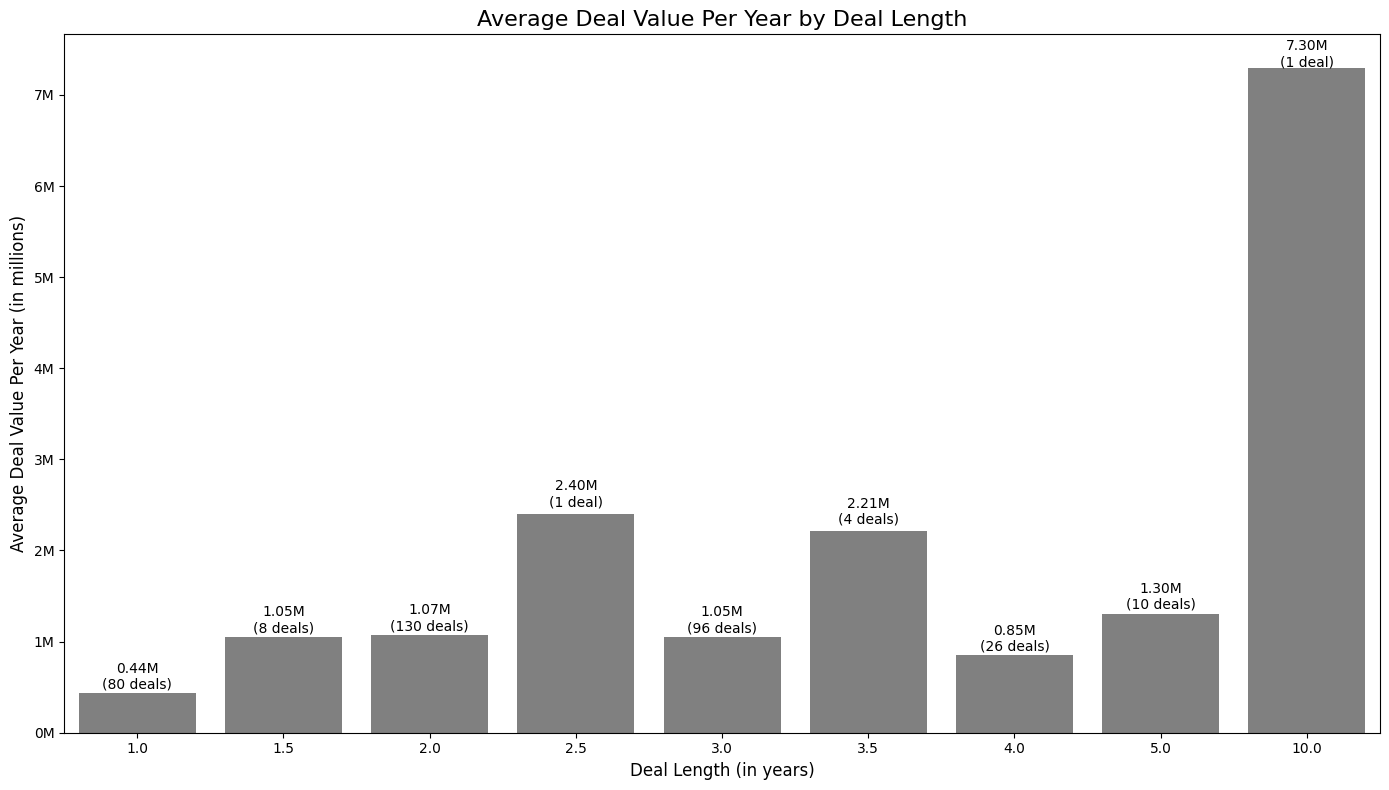

In [42]:
# Creating the "Deal Value Per Year" column
filtered_risers_league_df['Deal Value Per Year'] = (
    filtered_risers_league_df['Simulated Deal Value'] / filtered_risers_league_df['Deal Length']
)

# Calculate the average deal value per year and count for each deal length
deal_length_stats = (
    filtered_risers_league_df.groupby('Deal Length')['Deal Value Per Year']
    .agg(['mean', 'count'])
    .reset_index()
)

# Create the bar plot
plt.figure(figsize=(14, 8))

sns.barplot(
    x='Deal Length',
    y='mean',
    data=deal_length_stats,
    color='grey'
)

# Annotate the bars with the average and count (handle singular/plural)
for idx, row in deal_length_stats.iterrows():
    avg_value = row['mean']
    count = row['count']
    label = f"{avg_value / 1e6:.2f}M\n({int(count)} {'deal' if count == 1 else 'deals'})"

    # Ensure annotations are within the plot bounds
    y_position = avg_value + (avg_value * 0.02)
    y_position = min(y_position, plt.gca().get_ylim()[1] - (plt.gca().get_ylim()[1] * 0.05))

    plt.text(
        x=idx,
        y=y_position,
        s=label,
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the plot
plt.title("Average Deal Value Per Year by Deal Length", fontsize=16)
plt.xlabel("Deal Length (in years)", fontsize=12)
plt.ylabel("Average Deal Value Per Year (in millions)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
plt.tight_layout()

# Show the plot
plt.show()


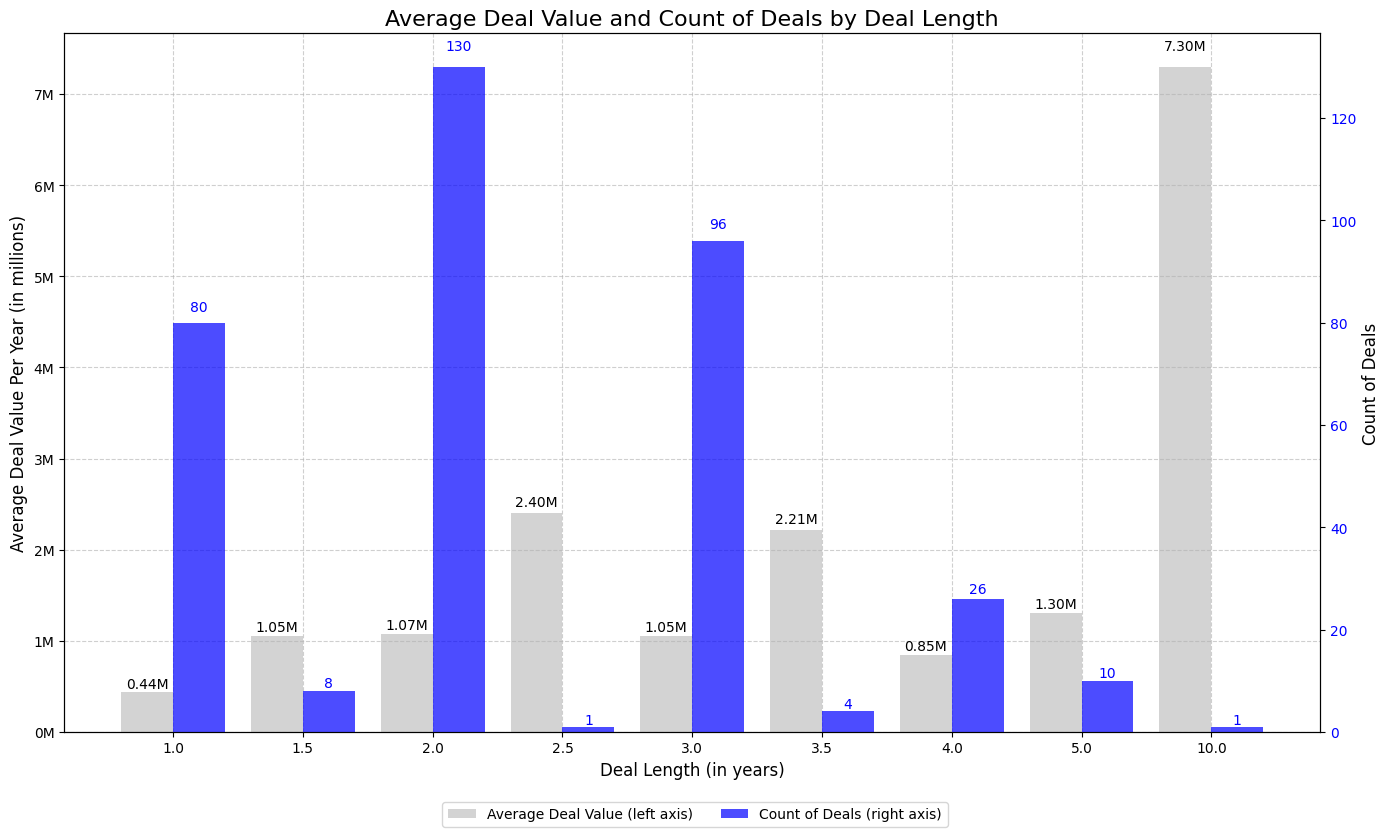

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

bar_width = 0.4
x = np.arange(len(deal_length_stats['Deal Length']))

# Plot the bar chart for average deal value
bars1 = ax1.bar(
    x - bar_width / 2,  # Adjust position for dual bars
    deal_length_stats['mean'],
    bar_width,
    color='lightgrey',
    label='Average Deal Value'
)
ax1.set_title("Average Deal Value and Count of Deals by Deal Length", fontsize=16)
ax1.set_xlabel("Deal Length (in years)", fontsize=12)
ax1.set_ylabel("Average Deal Value Per Year (in millions)", fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create the second y-axis for the count of deals
ax2 = ax1.twinx()
bars2 = ax2.bar(
    x + bar_width / 2,  # Adjust position for dual bars
    deal_length_stats['count'],
    bar_width,
    color='blue',
    alpha=0.7,
    label='Count of Deals'
)
ax2.set_ylabel("Count of Deals", fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Annotate bar heights for average deal value
for idx, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height + (height * 0.02),
        f"{height / 1e6:.2f}M",
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Annotate bar heights for count of deals
for idx, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height + (height * 0.02),
        f"{int(height)}",
        ha='center', va='bottom', fontsize=10, color='blue'
    )

# Combine legends
fig.legend(
    loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=2, fontsize=10,
    handles=[bars1, bars2],
    labels=['Average Deal Value (left axis)', 'Count of Deals (right axis)']
)

# Adjust layout
plt.xticks(ticks=x, labels=deal_length_stats['Deal Length'])
plt.tight_layout()

# Show the plot
plt.show()


In [44]:
# Get the top 20 deals by value per year
top_20_deals = filtered_risers_league_df.nlargest(20, 'Deal Value Per Year')

# Format deal value per year and simulated deal value for better readability
top_20_deals['Deal Value Per Year'] = top_20_deals['Deal Value Per Year'].apply(lambda x: f"{x / 1e6:.2f}M")
top_20_deals['Simulated Deal Value'] = top_20_deals['Simulated Deal Value'].apply(lambda x: f"{x / 1e6:.2f}M")

# Select relevant columns
top_20_table = top_20_deals[['Sponsor', 'Sponsor Location', 'Category', 'Sponsor inventory',
                             'Deal Length', 'Simulated Deal Value', 'Deal Value Per Year']]

# Print the table
print("Top 20 Deals by Value Per Year (Formatted):")
print(top_20_table.to_string(index=False))

Top 20 Deals by Value Per Year (Formatted):
             Sponsor         Sponsor Location               Category Sponsor inventory  Deal Length Simulated Deal Value Deal Value Per Year
       AXA Insurance                   France      General Insurance     Major Partner          2.0               38.00M              19.00M
              Kraken United States of America         Cryptocurrency     Major Partner          3.0               52.00M              17.33M
               Kirin                    Japan                   Beer     Major Partner          5.0               52.00M              10.40M
    Aldar Properties     United Arab Emirates     Real Estate Agency     Major Partner          2.0               17.00M               8.50M
           Doo Group                Singapore Forex & Online Trading     Major Partner          2.0               16.00M               8.00M
         MGM Resorts United States of America                Casinos     Major Partner          3.0           

In [45]:
# Get the bottom 20 deals by value per year
bottom_20_deals = filtered_risers_league_df.nsmallest(20, 'Deal Value Per Year')

# Format deal value per year and simulated deal value for better readability
bottom_20_deals['Deal Value Per Year'] = bottom_20_deals['Deal Value Per Year'].apply(lambda x: f"{x / 1e6:.2f}M")
bottom_20_deals['Simulated Deal Value'] = bottom_20_deals['Simulated Deal Value'].apply(lambda x: f"{x / 1e6:.2f}M")

# Select relevant columns
bottom_20_table = bottom_20_deals[['Sponsor', 'Sponsor Location', 'Category', 'Sponsor inventory',
                                   'Deal Length', 'Simulated Deal Value', 'Deal Value Per Year']]

# Print the table
print("Bottom 20 Deals by Value Per Year (Formatted):")
print(bottom_20_table.to_string(index=False))


Bottom 20 Deals by Value Per Year (Formatted):
                          Sponsor Sponsor Location                             Category Sponsor inventory  Deal Length Simulated Deal Value Deal Value Per Year
                        Donatello          England            Bars, Clubs & Restaurants  Official Partner          3.0                0.05M               0.02M
                Mayo Wynne Baxter          England                                Legal  Official Partner          5.0                0.10M               0.02M
                   Piglets Pantry          England                    Catering Services  Regional Partner          4.0                0.10M               0.03M
                    Bargate Homes          England              Home Improvement Retail  Regional Partner          2.0                0.05M               0.03M
             Sharkey's Sports Bar          England            Bars, Clubs & Restaurants  Regional Partner          2.0                0.05M              

In [46]:
# Filter out deals where Sponsor Inventory equals 'Regional Partner'
filtered_bottom_20_deals = filtered_risers_league_df[filtered_risers_league_df['Sponsor inventory'] != 'Regional Partner']

# Get the bottom 20 deals by value per year from the filtered dataset
filtered_bottom_20_deals = filtered_bottom_20_deals.nsmallest(20, 'Deal Value Per Year')

# Format deal value per year and simulated deal value for better readability
filtered_bottom_20_deals['Deal Value Per Year'] = filtered_bottom_20_deals['Deal Value Per Year'].apply(lambda x: f"{x / 1e6:.2f}M")
filtered_bottom_20_deals['Simulated Deal Value'] = filtered_bottom_20_deals['Simulated Deal Value'].apply(lambda x: f"{x / 1e6:.2f}M")

# Select relevant columns
filtered_bottom_20_table = filtered_bottom_20_deals[['Sponsor', 'Sponsor Location', 'Category',
                                                     'Sponsor inventory', 'Deal Length', 'Simulated Deal Value',
                                                     'Deal Value Per Year']]

# Print the table
print("Bottom 20 Deals by Value Per Year (Excluding Regional Partners):")
print(filtered_bottom_20_table.to_string(index=False))


Bottom 20 Deals by Value Per Year (Excluding Regional Partners):
                   Sponsor         Sponsor Location                  Category Sponsor inventory  Deal Length Simulated Deal Value Deal Value Per Year
                 Donatello                  England Bars, Clubs & Restaurants  Official Partner          3.0                0.05M               0.02M
         Mayo Wynne Baxter                  England                     Legal  Official Partner          5.0                0.10M               0.02M
          Net World Sports                    Wales     Sporting Goods Retail  Official Sponsor          4.0                0.10M               0.03M
                   GAMSTOP                  England       Gov. & Institutions  Official Partner          4.0                0.10M               0.03M
                   Magners                  England                      Beer  Official Partner          3.0                0.10M               0.03M
                 Rockwater         

<ipython-input-47-254ed29a4a18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_column, y='Frequency', data=grouped_data, palette='viridis')


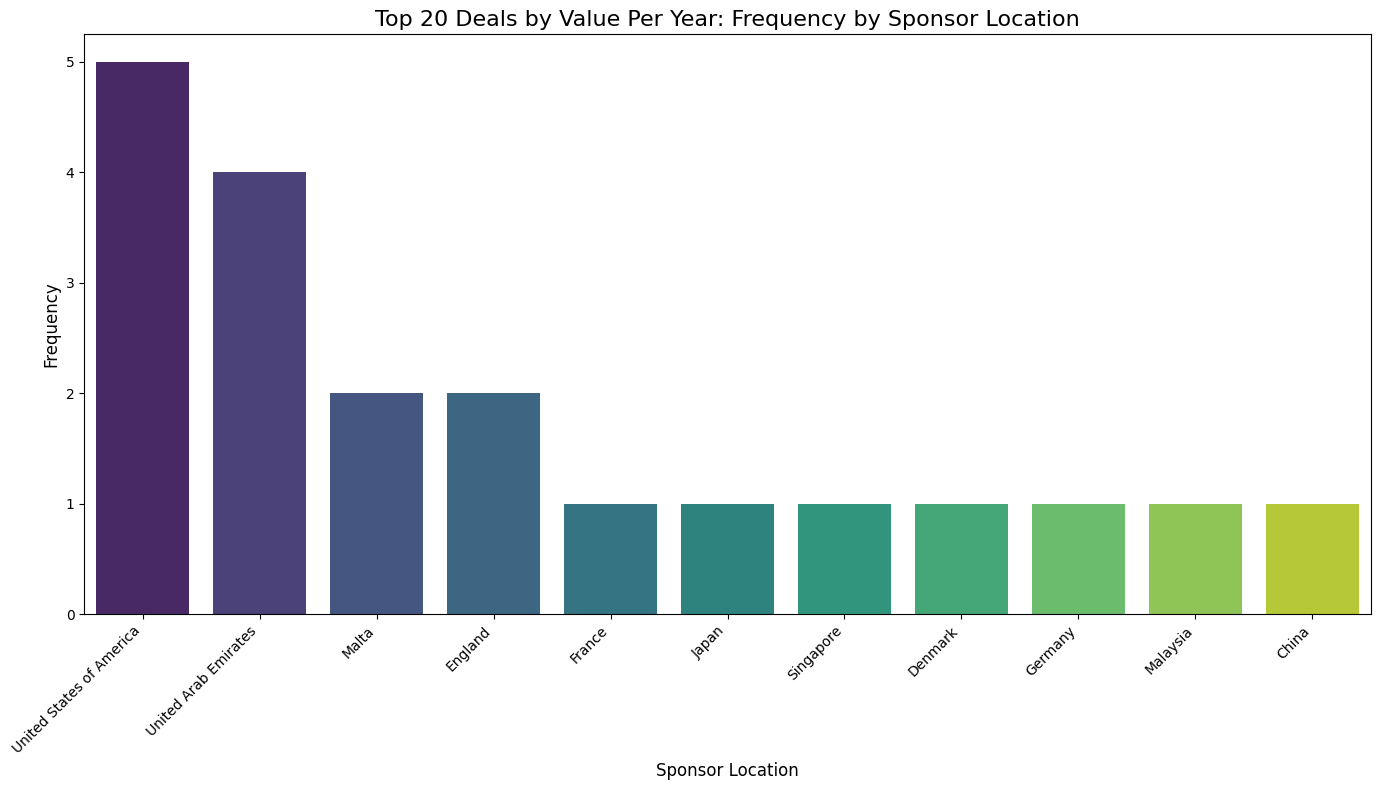

<ipython-input-47-254ed29a4a18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_column, y='Frequency', data=grouped_data, palette='viridis')


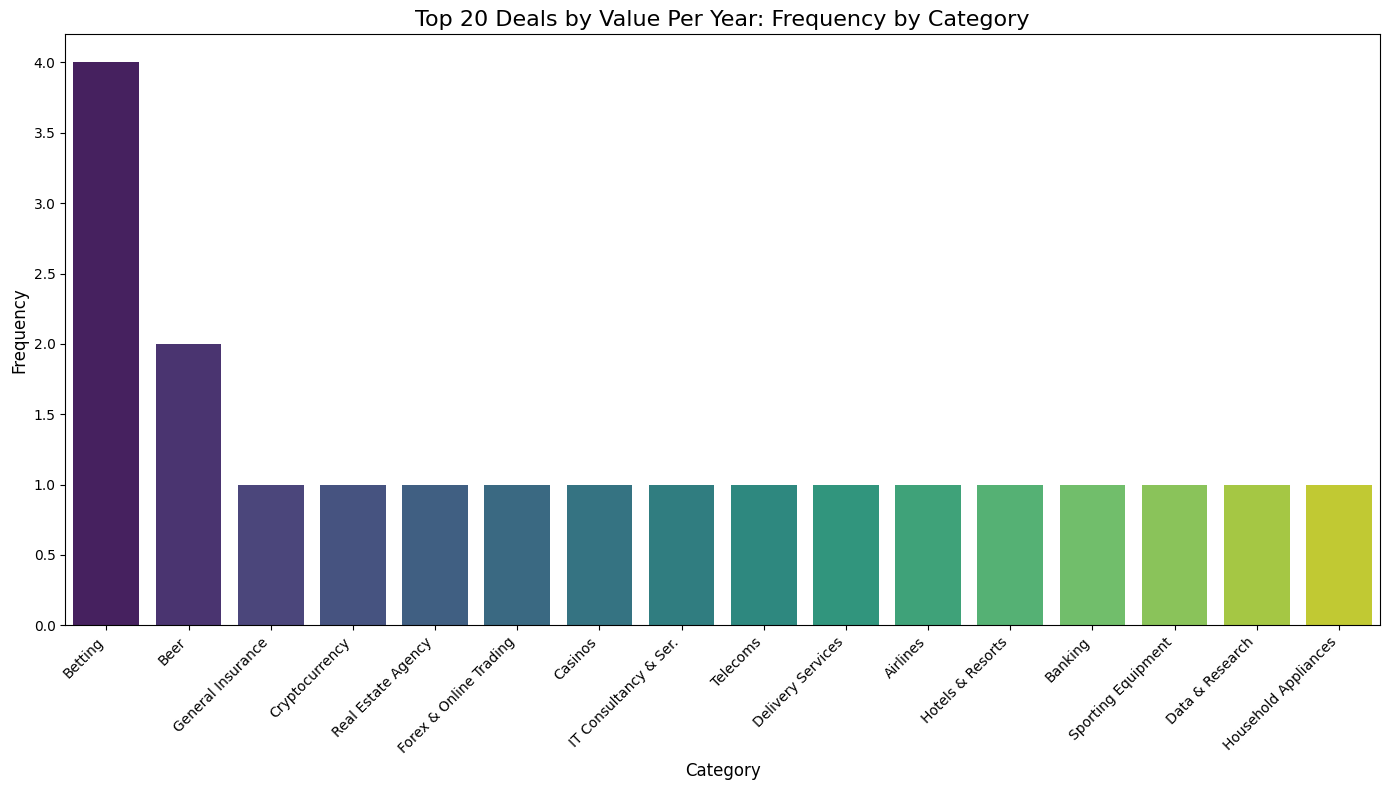

<ipython-input-47-254ed29a4a18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_column, y='Frequency', data=grouped_data, palette='viridis')


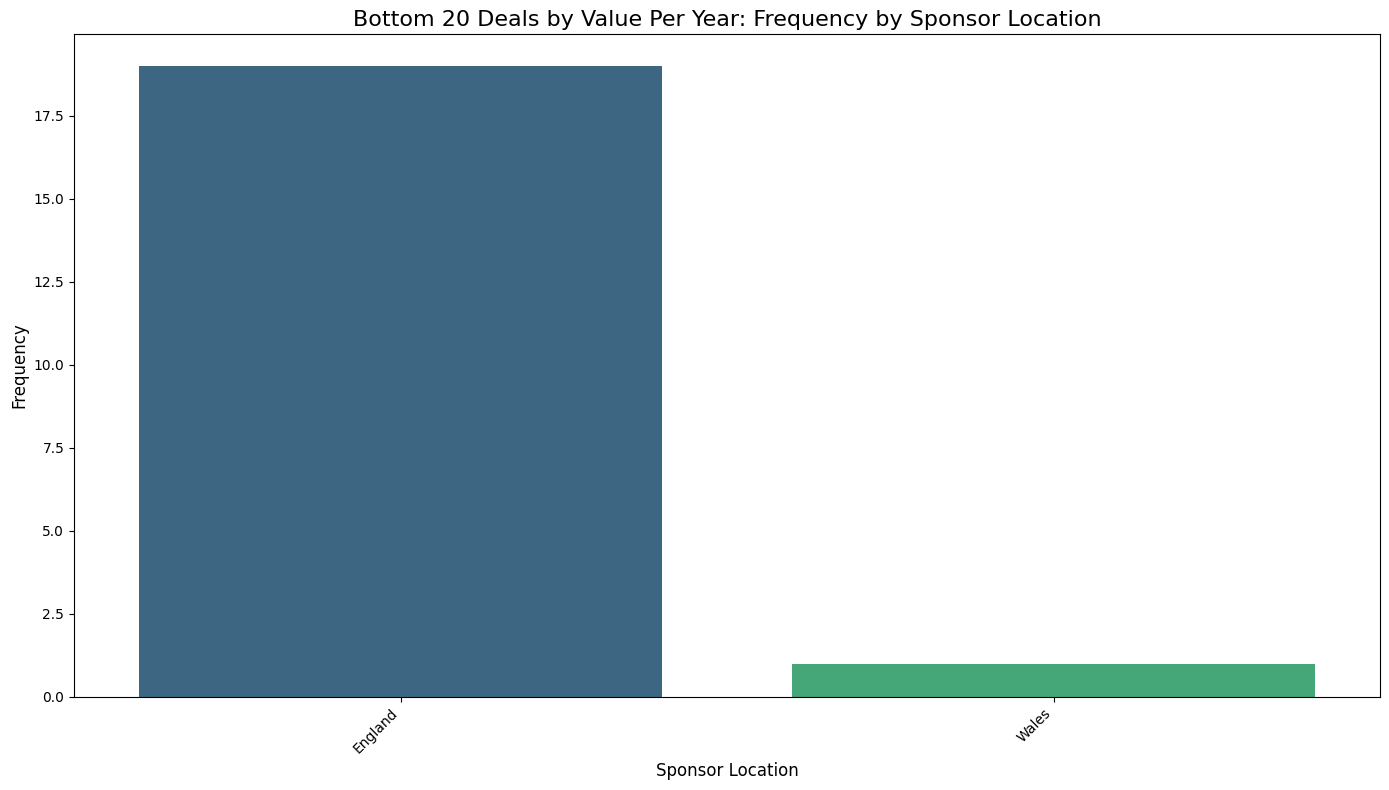

<ipython-input-47-254ed29a4a18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_column, y='Frequency', data=grouped_data, palette='viridis')


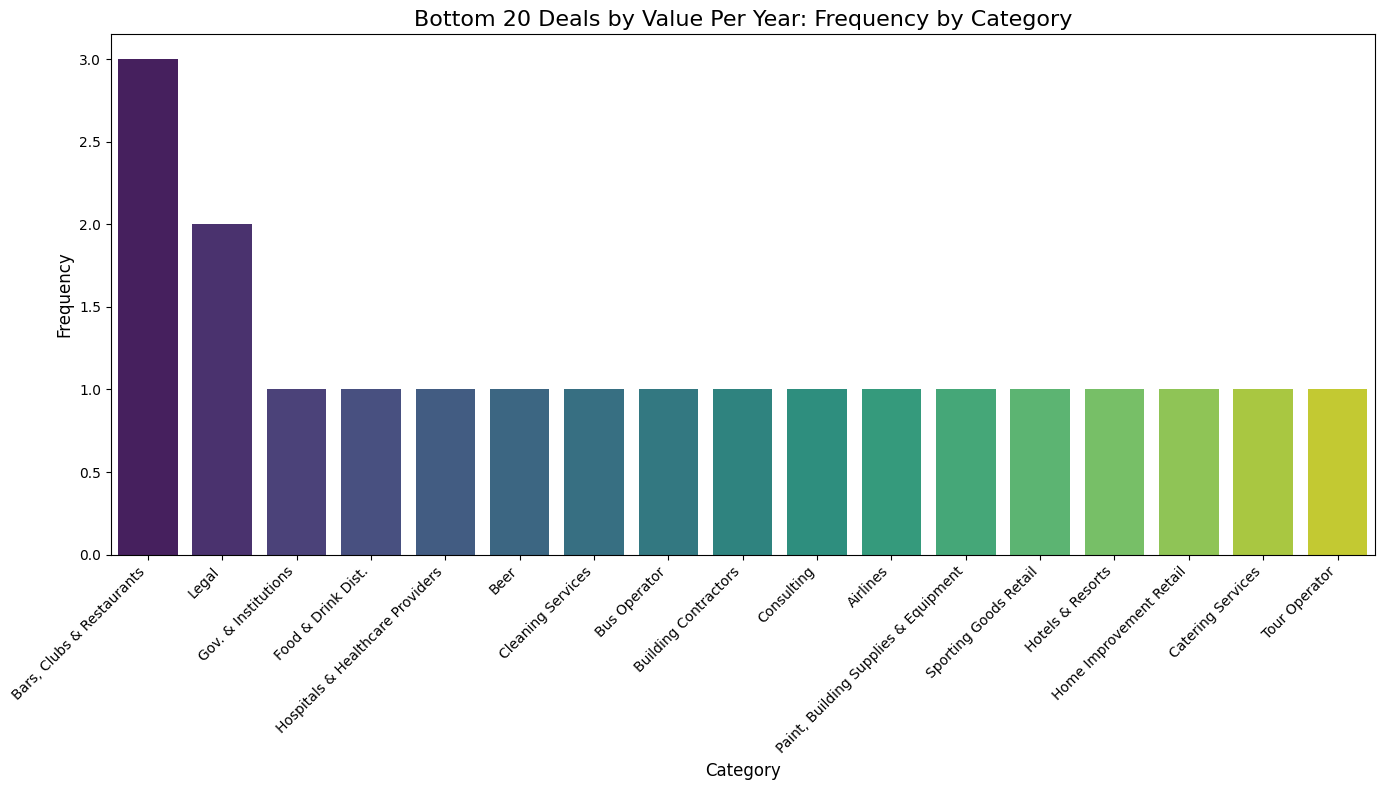

<ipython-input-47-254ed29a4a18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_column, y='Frequency', data=grouped_data, palette='viridis')


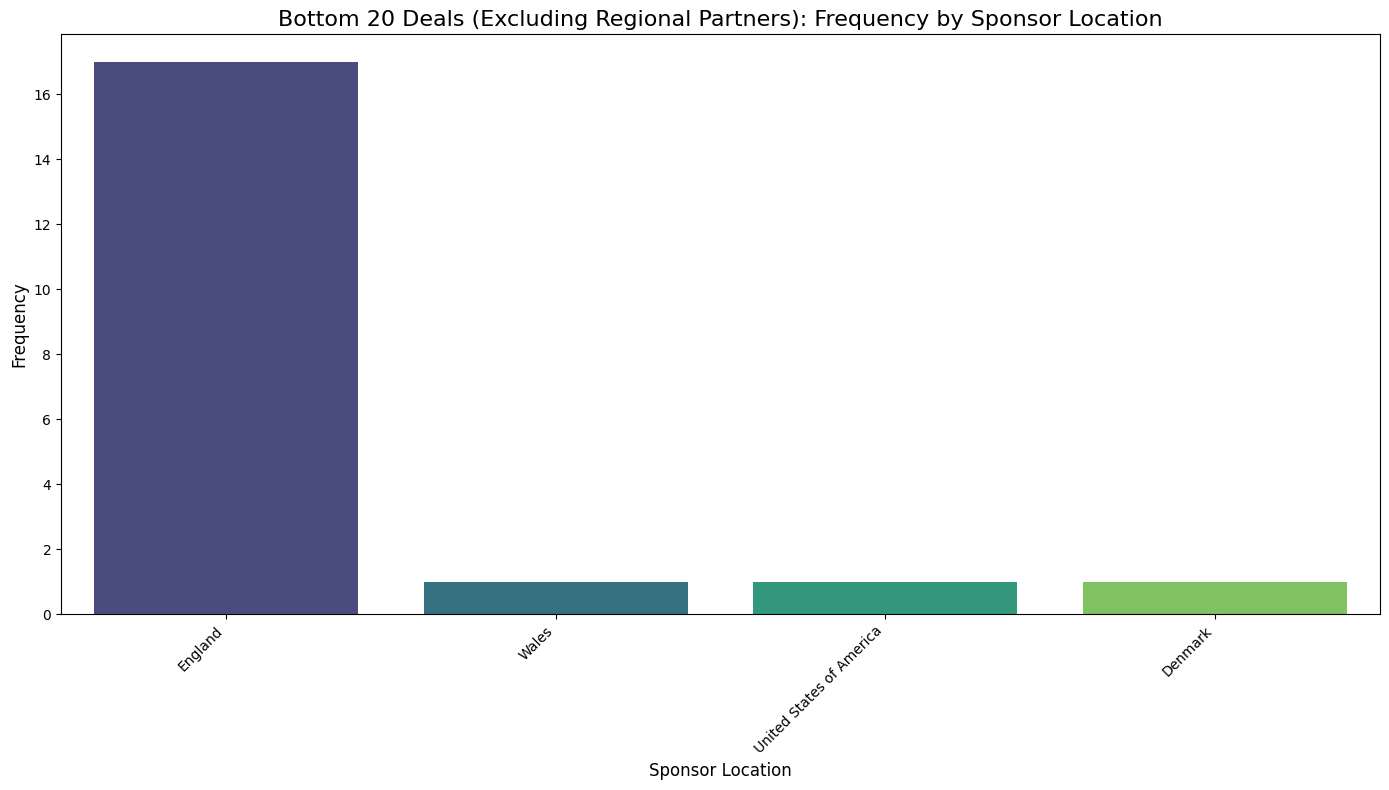

<ipython-input-47-254ed29a4a18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_column, y='Frequency', data=grouped_data, palette='viridis')


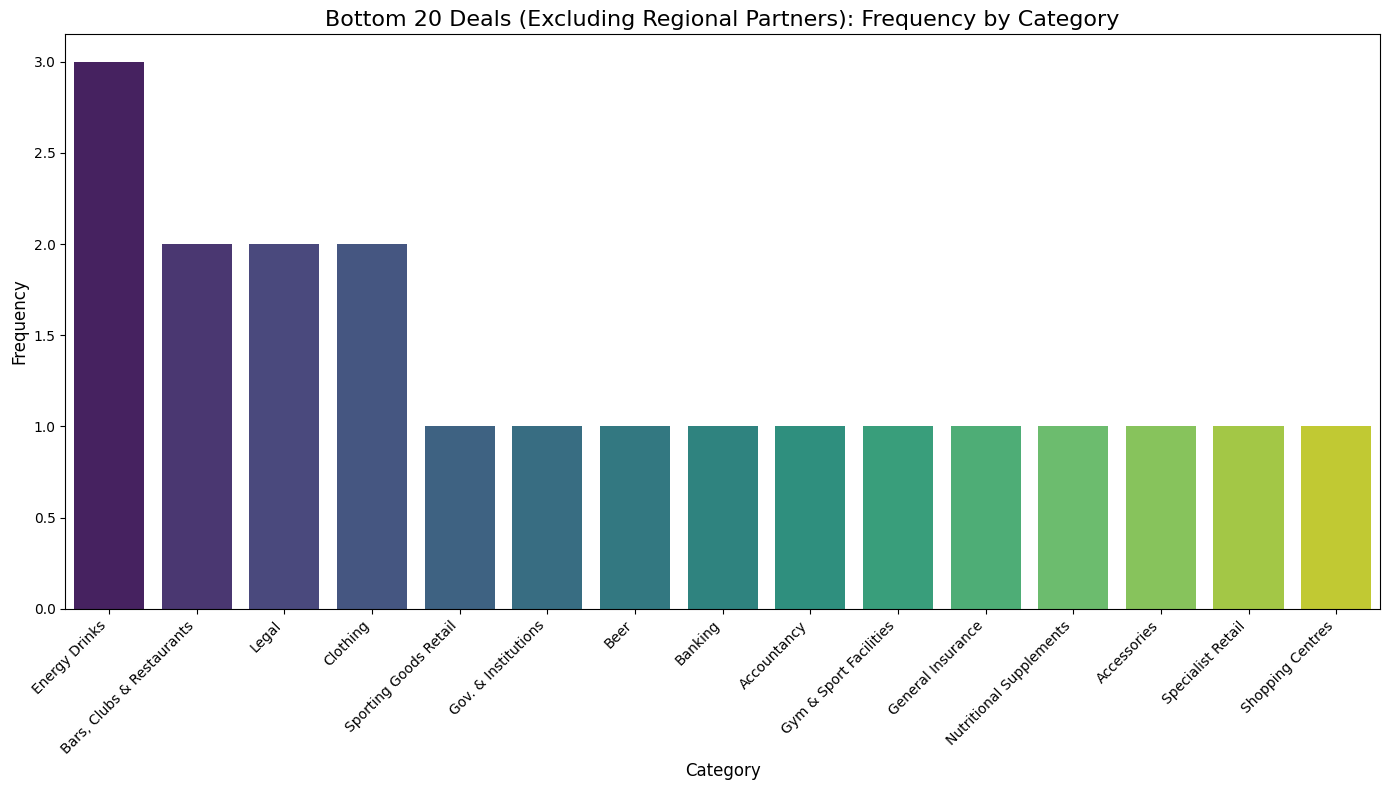

In [47]:
# Function to create bar charts for frequency analysis
def plot_frequency_bar_chart(dataframe, group_by_column, title, x_label, output_filename):
    # Group data by the specified column
    grouped_data = dataframe[group_by_column].value_counts().reset_index()
    grouped_data.columns = [group_by_column, 'Frequency']

    # Plot the bar chart
    plt.figure(figsize=(14, 8))
    sns.barplot(x=group_by_column, y='Frequency', data=grouped_data, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

# Top 20 Deals by Sponsor Location
plot_frequency_bar_chart(
    top_20_table,
    'Sponsor Location',
    "Top 20 Deals by Value Per Year: Frequency by Sponsor Location",
    "Sponsor Location",
    'top_20_frequency_by_sponsor_location.png'
)

# Top 20 Deals by Category
plot_frequency_bar_chart(
    top_20_table,
    'Category',
    "Top 20 Deals by Value Per Year: Frequency by Category",
    "Category",
    'top_20_frequency_by_category.png'
)

# Bottom 20 Deals by Sponsor Location
plot_frequency_bar_chart(
    bottom_20_table,
    'Sponsor Location',
    "Bottom 20 Deals by Value Per Year: Frequency by Sponsor Location",
    "Sponsor Location",
    'bottom_20_frequency_by_sponsor_location.png'
)

# Bottom 20 Deals by Category
plot_frequency_bar_chart(
    bottom_20_table,
    'Category',
    "Bottom 20 Deals by Value Per Year: Frequency by Category",
    "Category",
    'bottom_20_frequency_by_category.png'
)

# Bottom 20 Deals Excluding Regional Partners by Sponsor Location
plot_frequency_bar_chart(
    filtered_bottom_20_table,
    'Sponsor Location',
    "Bottom 20 Deals (Excluding Regional Partners): Frequency by Sponsor Location",
    "Sponsor Location",
    'filtered_bottom_20_frequency_by_sponsor_location.png'
)

# Bottom 20 Deals Excluding Regional Partners by Category
plot_frequency_bar_chart(
    filtered_bottom_20_table,
    'Category',
    "Bottom 20 Deals (Excluding Regional Partners): Frequency by Category",
    "Category",
    'filtered_bottom_20_frequency_by_category.png'
)


<ipython-input-52-76b0f9134b30>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-52-76b0f9134b30>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-52-76b0f9134b30>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-52-76b0f9134b30>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-52-76b0f9134b30>:81: FutureWarning: 

Passing `pa

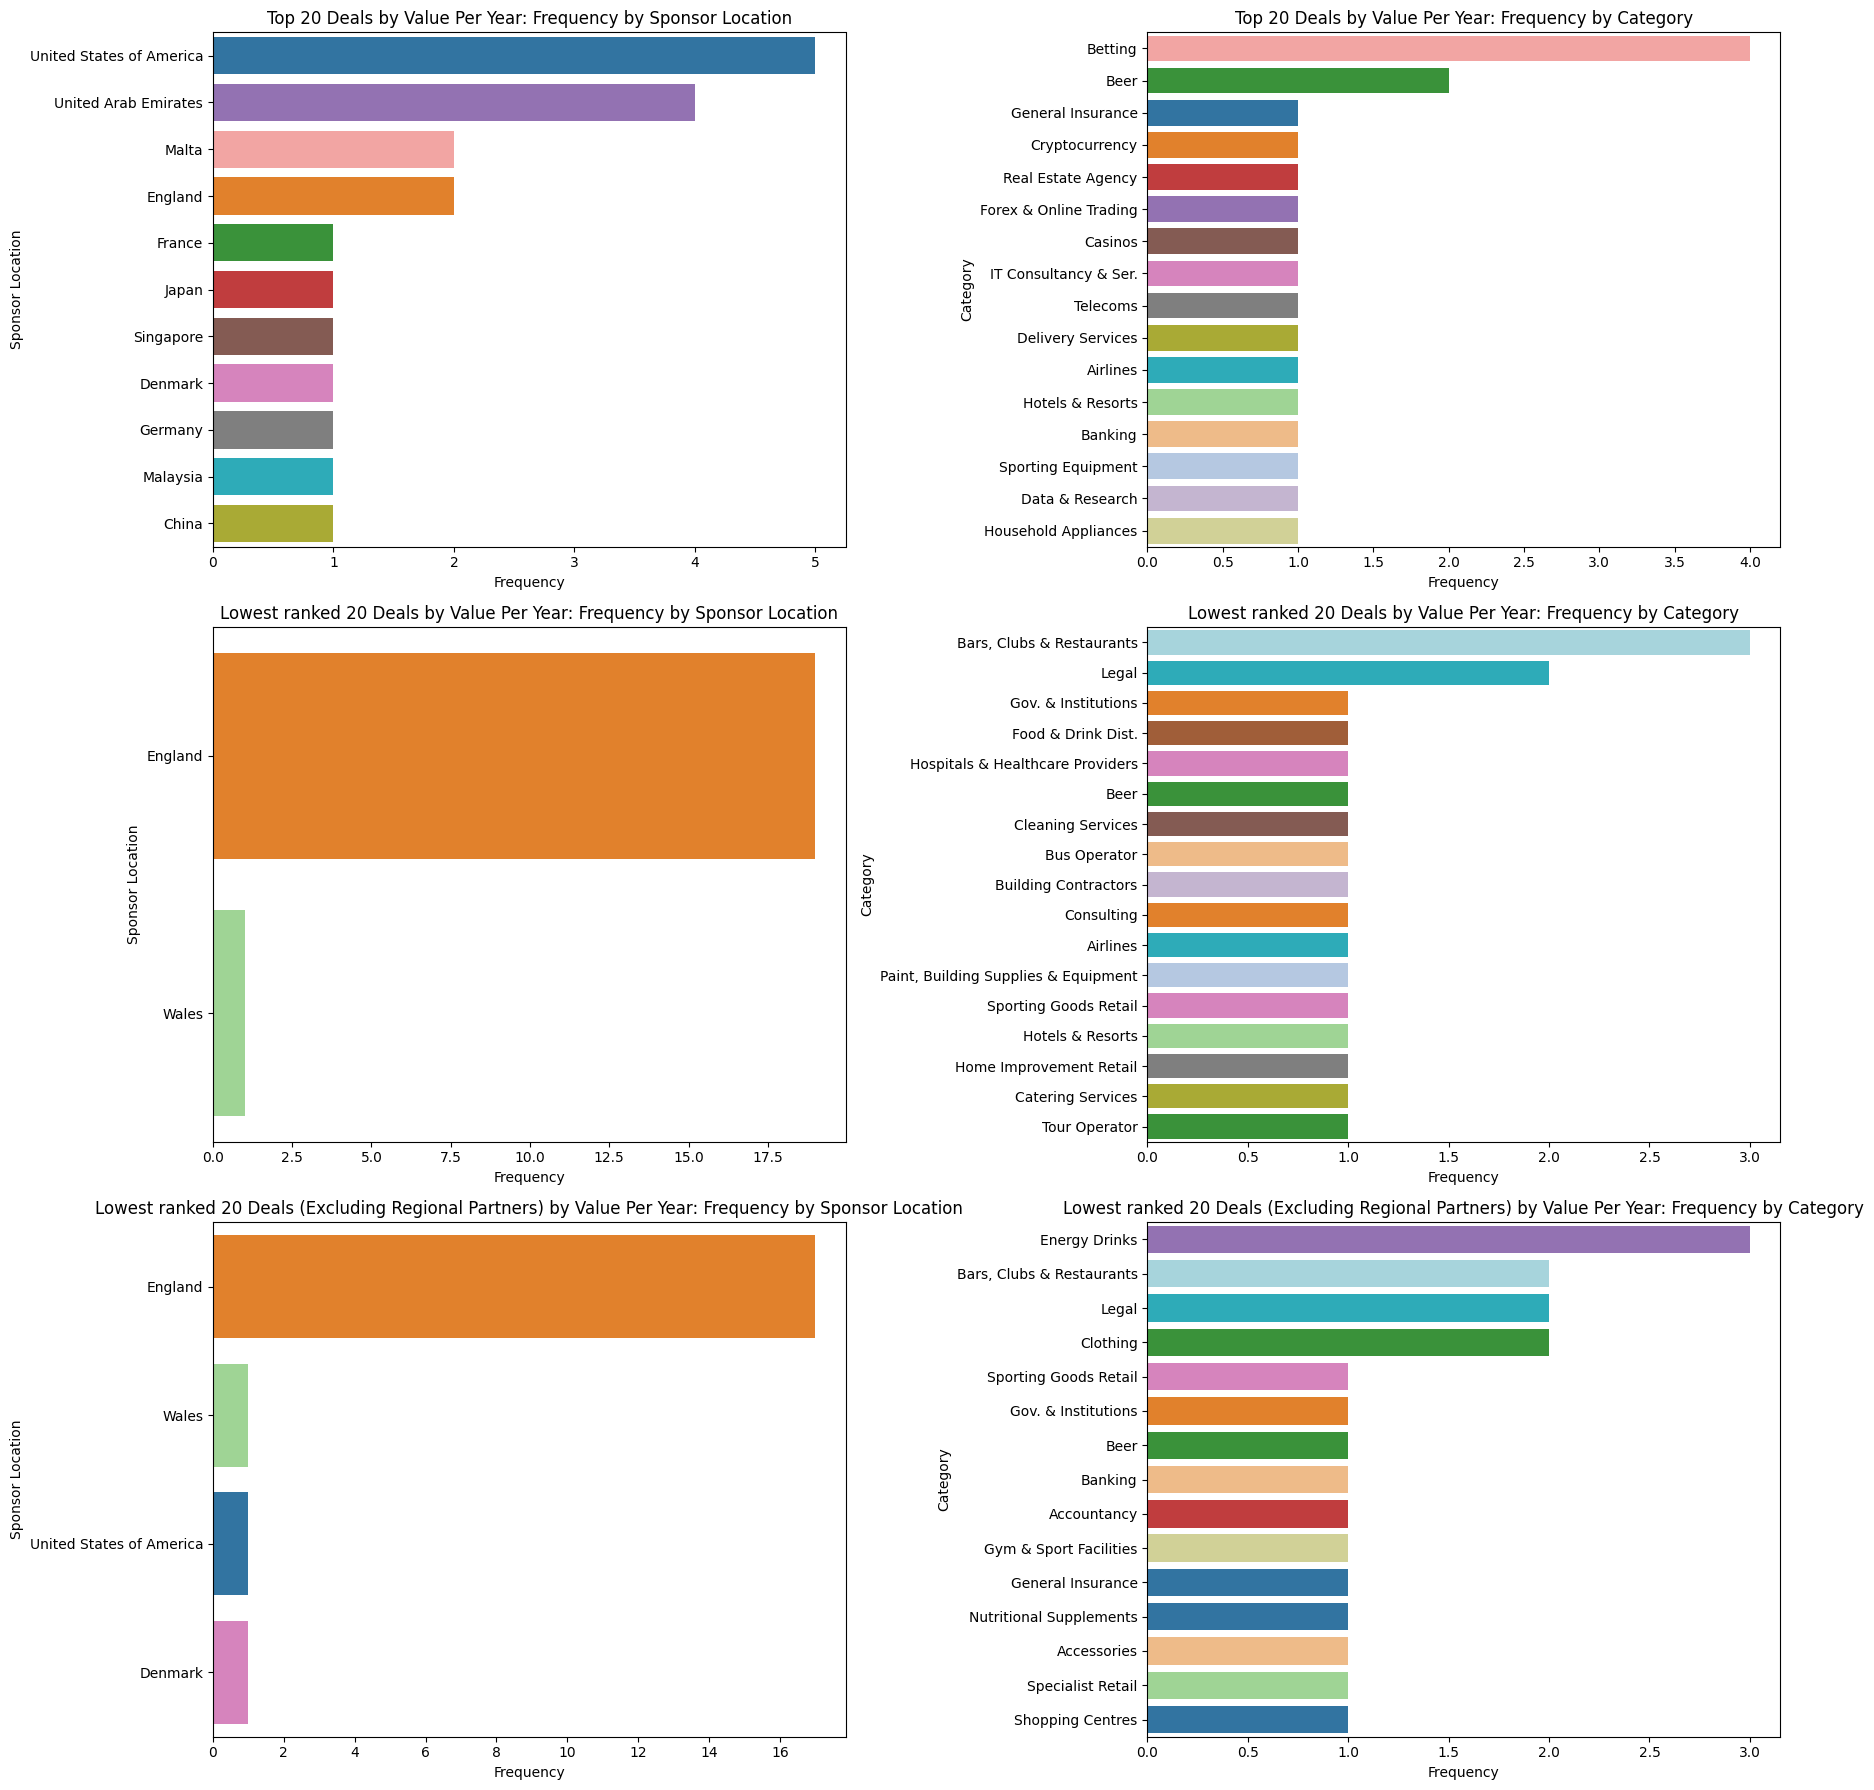

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define consistent color palettes
sponsor_location_palette = {
    "United States of America": "#1f77b4",
    "England": "#ff7f0e",
    "France": "#2ca02c",
    "Japan": "#d62728",
    "United Arab Emirates": "#9467bd",
    "Singapore": "#8c564b",
    "Denmark": "#e377c2",
    "Germany": "#7f7f7f",
    "China": "#bcbd22",
    "Malaysia": "#17becf",
    "Malta": "#ff9896",
    "Wales": "#98df8a",
}

category_palette = {
    "General Insurance": "#1f77b4",
    "Cryptocurrency": "#ff7f0e",
    "Beer": "#2ca02c",
    "Real Estate Agency": "#d62728",
    "Forex & Online Trading": "#9467bd",
    "Casinos": "#8c564b",
    "IT Consultancy & Ser.": "#e377c2",
    "Telecoms": "#7f7f7f",
    "Delivery Services": "#bcbd22",
    "Airlines": "#17becf",
    "Betting": "#ff9896",
    "Hotels & Resorts": "#98df8a",
    "Banking": "#ffbb78",
    "Sporting Equipment": "#aec7e8",
    "Data & Research": "#c5b0d5",
    "Household Appliances": "#dbdb8d",
    "Bars, Clubs & Restaurants": "#9edae5",
    "Legal": "#17becf",
    "Catering Services": "#bcbd22",
    "Home Improvement Retail": "#7f7f7f",
    "Sporting Goods Retail": "#e377c2",
    "Cleaning Services": "#8c564b",
    "Energy Drinks": "#9467bd",
    "Accountancy": "#d62728",
    "Clothing": "#2ca02c",
    "Gov. & Institutions": "#ff7f0e",
    "Shopping Centres": "#1f77b4",
    "Building Contractors": "#c5b0d5",
    "Accessories": "#ffbb78",
    "Specialist Retail": "#98df8a",
    "Gym & Sport Facilities": "#dbdb8d",
    "Food & Drink Dist.": "#b15928",
    "Hospitals & Healthcare Providers": "#e377c2",
}

import matplotlib.colors as mcolors
from itertools import cycle

# Generate a list of colors
default_colors = cycle(sns.color_palette("tab20", n_colors=20).as_hex())

# Update category_palette dynamically
all_categories = set(
    top_20_table['Category'].unique()
).union(
    bottom_20_table['Category'].unique(),
    filtered_bottom_20_table['Category'].unique()
)

for category in all_categories:
    if category not in category_palette:
        category_palette[category] = next(default_colors)


def plot_frequency_bar_chart(dataframe, group_by_column, title, x_label, palette, ax):
    # Group data by the specified column
    grouped_data = dataframe[group_by_column].value_counts().reset_index()
    grouped_data.columns = [group_by_column, 'Frequency']

    # Plot the horizontal bar chart
    sns.barplot(
        y=grouped_data[group_by_column],
        x=grouped_data['Frequency'],
        palette=[palette[val] for val in grouped_data[group_by_column]],
        ax=ax
    )
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x_label, fontsize=10)
    ax.set_ylabel(group_by_column, fontsize=10)
    ax.tick_params(axis='y', labelsize=10)


# Create a grid layout for the charts
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

# Top 20 Deals by Sponsor Location
plot_frequency_bar_chart(
    top_20_table,
    'Sponsor Location',
    "Top 20 Deals by Value Per Year: Frequency by Sponsor Location",
    "Frequency",
    sponsor_location_palette,
    axes[0]
)

# Top 20 Deals by Category
plot_frequency_bar_chart(
    top_20_table,
    'Category',
    "Top 20 Deals by Value Per Year: Frequency by Category",
    "Frequency",
    category_palette,
    axes[1]
)

# Bottom 20 Deals by Sponsor Location
plot_frequency_bar_chart(
    bottom_20_table,
    'Sponsor Location',
    "Lowest ranked 20 Deals by Value Per Year: Frequency by Sponsor Location",
    "Frequency",
    sponsor_location_palette,
    axes[2]
)

# Bottom 20 Deals by Category
plot_frequency_bar_chart(
    bottom_20_table,
    'Category',
    "Lowest ranked 20 Deals by Value Per Year: Frequency by Category",
    "Frequency",
    category_palette,
    axes[3]
)

# Bottom 20 Deals Excluding Regional Partners by Sponsor Location
plot_frequency_bar_chart(
    filtered_bottom_20_table,
    'Sponsor Location',
    "Lowest ranked 20 Deals (Excluding Regional Partners) by Value Per Year: Frequency by Sponsor Location",
    "Frequency",
    sponsor_location_palette,
    axes[4]
)

# Bottom 20 Deals Excluding Regional Partners by Category
plot_frequency_bar_chart(
    filtered_bottom_20_table,
    'Category',
    "Lowest ranked 20 Deals (Excluding Regional Partners) by Value Per Year: Frequency by Category",
    "Frequency",
    category_palette,
    axes[5]
)

# Adjust layout
plt.tight_layout()
#plt.savefig("horizontal_frequency_bar_charts_grid.png")
plt.show()

In [25]:
# Filter for all deals for Two Circles FC
two_circles_fc_deals = risers_league_df[risers_league_df['Rights Holder'] == 'Two Circles FC']

# Calculate deal value per year (if not already calculated)
two_circles_fc_deals['Deal Value Per Year'] = (
    two_circles_fc_deals['Simulated Deal Value'] / two_circles_fc_deals['Deal Length']
)

# Format deal value per year and simulated deal value for better readability
two_circles_fc_deals['Deal Value Per Year'] = two_circles_fc_deals['Deal Value Per Year'].apply(lambda x: f"{x / 1e6:.2f}M")
two_circles_fc_deals['Simulated Deal Value'] = two_circles_fc_deals['Simulated Deal Value'].apply(lambda x: f"{x / 1e6:.2f}M")

# Select relevant columns for the table
two_circles_fc_table = two_circles_fc_deals[['Sponsor', 'Sponsor Location', 'Category',
                                             'Sponsor inventory', 'Deal Length', 'Simulated Deal Value',
                                             'Deal Value Per Year']]

# Sort the table by deal value per year in descending order
two_circles_fc_table = two_circles_fc_table.sort_values(by='Deal Value Per Year', ascending=False)

# Display the table
print("All Deals for Two Circles FC Ordered by Deal Value Per Year (Formatted):")
print(two_circles_fc_table.to_string(index=False))


All Deals for Two Circles FC Ordered by Deal Value Per Year (Formatted):
                             Sponsor         Sponsor Location                    Category       Sponsor inventory  Deal Length Simulated Deal Value Deal Value Per Year
                    Aldar Properties     United Arab Emirates          Real Estate Agency           Major Partner          2.0               17.00M               8.50M
                        Visit Rwanda                   Rwanda           Tourism Authority          Sleeve Sponsor          5.0               39.00M               7.80M
                              Betway                    Malta                     Betting        Official Sponsor          4.0               21.00M               5.25M
                          Nike, Inc.                  Germany            Sporting Apparel            Kit Supplier          6.0              254.00M              42.33M
                      Etihad Airways     United Arab Emirates                    Airlin

<ipython-input-25-cc02ff02d6a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_circles_fc_deals['Deal Value Per Year'] = (
<ipython-input-25-cc02ff02d6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_circles_fc_deals['Deal Value Per Year'] = two_circles_fc_deals['Deal Value Per Year'].apply(lambda x: f"{x / 1e6:.2f}M")
<ipython-input-25-cc02ff02d6a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
len(two_circles_fc_table['Category'].unique())

22

In [26]:
# Get unique categories from both tables
top_20_categories = set(top_20_table['Category'].unique())
two_circles_categories = set(two_circles_fc_table['Category'].unique())

# Find the gap
category_gap = top_20_categories - two_circles_categories

# Display the gap
print("Categories in Top 20 Deals Missing from Two Circles FC's Portfolio:")
print(category_gap)


Categories in Top 20 Deals Missing from Two Circles FC's Portfolio:
{'General Insurance', 'IT Consultancy & Ser.', 'Hotels & Resorts', 'Data & Research', 'Casinos', 'Telecoms', 'Banking', 'Household Appliances', 'Sporting Equipment'}


In [29]:
category_gap2 = category_gap - set(bottom_20_table['Category'].unique())

In [30]:
category_gap2 - set(filtered_bottom_20_table['Category'].unique())

{'Casinos',
 'Data & Research',
 'Household Appliances',
 'IT Consultancy & Ser.',
 'Sporting Equipment',
 'Telecoms'}